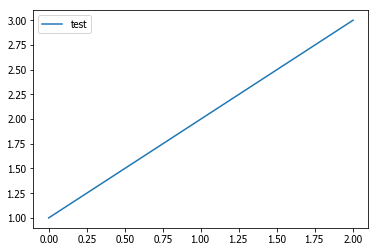

In [4]:
#Configuring the font family 

#You can explicitly set which font family is picked up for a given font style (e.g., ‘serif’, ‘sans-serif’, or ‘monospace’).
#In the example below, we only allow one font family (Tahoma) for the san-serif font style. You the default family with the font.family rc param, e.g.,:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'sans-serif'

#and for the font.family you set a list of font styles to try to find in order:

plt.rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans',
                               'Lucida Grande', 'Verdana']
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot([1, 2, 3], label='test')

ax.legend()
plt.show()

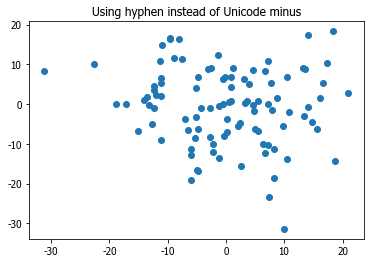

In [5]:
#Unicode minus

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.plot(10*np.random.randn(100), 10*np.random.randn(100), 'o')
ax.set_title('Using hyphen instead of Unicode minus')
plt.show()

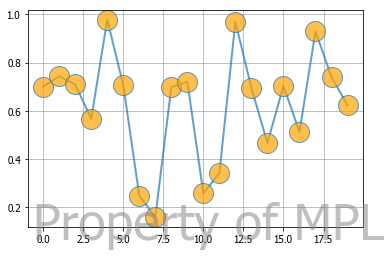

In [6]:
#Text watermark

#Use a Text as a watermark

import numpy as np
#import matplotlib
#matplotlib.use('Agg')

import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, ax = plt.subplots()
ax.plot(np.random.rand(20), '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
ax.grid()

# position bottom right
fig.text(0.95, 0.05, 'Property of MPL',
         fontsize=50, color='gray',
         ha='right', va='bottom', alpha=0.5)

plt.show()

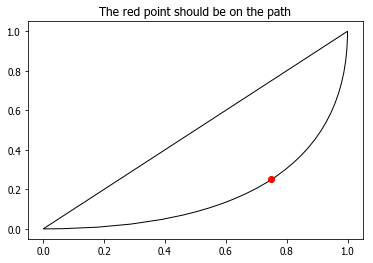

In [7]:
#Bezier Curve

#This example showcases the PathPatch object to create a Bezier polycurve path patch.

import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

Path = mpath.Path

fig, ax = plt.subplots()
pp1 = mpatches.PathPatch(
    Path([(0, 0), (1, 0), (1, 1), (0, 0)],
         [Path.MOVETO, Path.CURVE3, Path.CURVE3, Path.CLOSEPOLY]),
    fc="none", transform=ax.transData)

ax.add_patch(pp1)
ax.plot([0.75], [0.25], "ro")
ax.set_title('The red point should be on the path')

plt.show()

In [11]:
#The object-oriented interface 面向对象的接口(没有图例)

#A pure OO (look Ma, no pyplot!) example using the agg backend.

from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

fig = Figure()
# A canvas must be manually attached to the figure (pyplot would automatically
# do it).  This is done by instanciating the canvas with the figure as
# argument.
FigureCanvas(fig)
ax = fig.add_subplot(111)
ax.plot([1, 2, 3])
ax.set_title('hi mom')
ax.grid(True)
ax.set_xlabel('time')
ax.set_ylabel('volts')
fig.savefig('test')


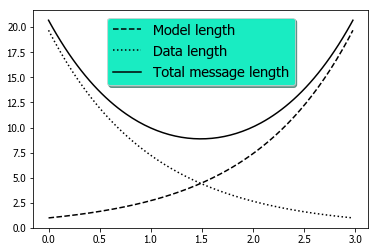

In [12]:
#Legend using pre-defined labels

#Notice how the legend labels are defined with the plots!

import numpy as np
import matplotlib.pyplot as plt

# Make some fake data.
a = b = np.arange(0, 3, .02)
c = np.exp(a)
d = c[::-1]

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(a, c, 'k--', label='Model length')
ax.plot(a, d, 'k:', label='Data length')
ax.plot(a, c + d, 'k', label='Total message length')

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('#00FFCC')

plt.show()

loading /Users/Ken/Library/Python/3.6/lib/python/site-packages/matplotlib/mpl-data/sample_data/logo2.png


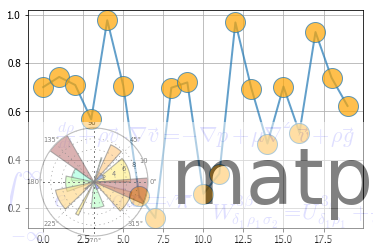

In [13]:
#Watermark image

#Use a PNG file as a watermark

from __future__ import print_function
import numpy as np
import matplotlib.cbook as cbook
import matplotlib.image as image
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


datafile = cbook.get_sample_data('logo2.png', asfileobj=False)
print('loading %s' % datafile)
im = image.imread(datafile)
im[:, :, -1] = 0.5  # set the alpha channel

fig, ax = plt.subplots()

ax.plot(np.random.rand(20), '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
ax.grid()
fig.figimage(im, 10, 10, zorder=3)

plt.show()

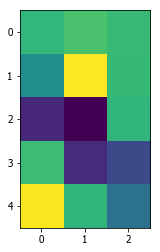

In [14]:
#Modifying the coordinate formatter

#Show how to modify the coordinate formatter to report the image “z” value of the nearest pixel given x and y

import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


X = 10*np.random.rand(5, 3)

fig, ax = plt.subplots()
ax.imshow(X, interpolation='nearest')

numrows, numcols = X.shape


def format_coord(x, y):
    col = int(x + 0.5)
    row = int(y + 0.5)
    if col >= 0 and col < numcols and row >= 0 and row < numrows:
        z = X[row, col]
        return 'x=%1.4f, y=%1.4f, z=%1.4f' % (x, y, z)
    else:
        return 'x=%1.4f, y=%1.4f' % (x, y)

ax.format_coord = format_coord
plt.show()

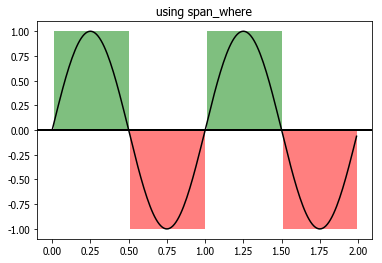

In [15]:
#Using span_where

#Illustrate some helper functions for shading regions where a logical mask is True
#See matplotlib.collections.BrokenBarHCollection.span_where()

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as collections


t = np.arange(0.0, 2, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = 1.2*np.sin(4*np.pi*t)


fig, ax = plt.subplots()
ax.set_title('using span_where')
ax.plot(t, s1, color='black')
ax.axhline(0, color='black', lw=2)

collection = collections.BrokenBarHCollection.span_where(
    t, ymin=0, ymax=1, where=s1 > 0, facecolor='green', alpha=0.5)
ax.add_collection(collection)

collection = collections.BrokenBarHCollection.span_where(
    t, ymin=-1, ymax=0, where=s1 < 0, facecolor='red', alpha=0.5)
ax.add_collection(collection)


plt.show()

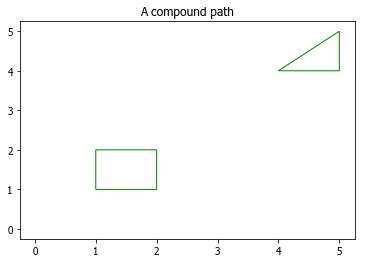

In [16]:
#Compound path

#Make a compound path – in this case two simple polygons, a rectangle and a triangle. 
#Use CLOSEPOLY and MOVETO for the different parts of the compound path

import numpy as np
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import matplotlib.pyplot as plt


vertices = []
codes = []

codes = [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY]
vertices = [(1, 1), (1, 2), (2, 2), (2, 1), (0, 0)]

codes += [Path.MOVETO] + [Path.LINETO]*2 + [Path.CLOSEPOLY]
vertices += [(4, 4), (5, 5), (5, 4), (0, 0)]

vertices = np.array(vertices, float)
path = Path(vertices, codes)

pathpatch = PathPatch(path, facecolor='None', edgecolor='green')

fig, ax = plt.subplots()
ax.add_patch(pathpatch)
ax.set_title('A compound path')

ax.dataLim.update_from_data_xy(vertices)
ax.autoscale_view()


plt.show()


In [20]:
#A mathtext image as numpy array

#This example shows how to make images from LaTeX strings.

import matplotlib.mathtext as mathtext
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('image', origin='upper')

parser = mathtext.MathTextParser("Bitmap")
parser.to_png('test2.png',
              r'$\left[\left\lfloor\frac{5}{\frac{\left(3\right)}{4}} '
              r'y\right)\right]$', color='green', fontsize=14, dpi=100)

rgba1, depth1 = parser.to_rgba(
    r'IQ: $\sigma_i=15$', color='blue', fontsize=20, dpi=200)
rgba2, depth2 = parser.to_rgba(
    r'some other string', color='red', fontsize=20, dpi=200)

fig = plt.figure()
fig.figimage(rgba1.astype(float)/255., 100, 100)
fig.figimage(rgba2.astype(float)/255., 100, 300)

plt.show()

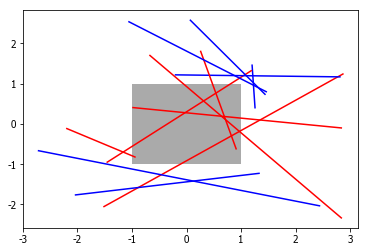

In [21]:
#Changing colors of lines intersecting a box

#The lines intersecting the rectangle are colored in red, while the others are left as blue lines. 
#This example showcases the intersect_bbox function.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox
from matplotlib.path import Path

# Fixing random state for reproducibility
np.random.seed(19680801)


left, bottom, width, height = (-1, -1, 2, 2)
rect = plt.Rectangle((left, bottom), width, height, facecolor="#aaaaaa")

fig, ax = plt.subplots()
ax.add_patch(rect)

bbox = Bbox.from_bounds(left, bottom, width, height)

for i in range(12):
    vertices = (np.random.random((2, 2)) - 0.5) * 6.0
    path = Path(vertices)
    if path.intersects_bbox(bbox):
        color = 'r'
    else:
        color = 'b'
    ax.plot(vertices[:, 0], vertices[:, 1], color=color)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: covariance is not positive-semidefinite.
  if sys.path[0] == '':


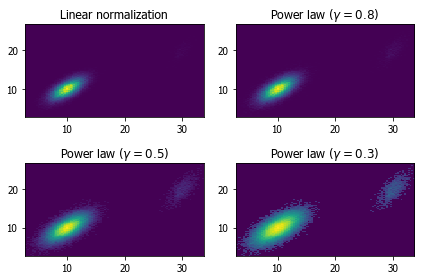

In [22]:
#Exploring normalizations

#Let’s explore various normalization on a multivariate normal distribution.

from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from numpy.random import multivariate_normal

data = np.vstack([
    multivariate_normal([10, 10], [[3, 2], [2, 3]], size=100000),
    multivariate_normal([30, 20], [[2, 3], [1, 3]], size=1000)
])

gammas = [0.8, 0.5, 0.3]

fig, axes = plt.subplots(nrows=2, ncols=2)

axes[0, 0].set_title('Linear normalization')
axes[0, 0].hist2d(data[:, 0], data[:, 1], bins=100)

for ax, gamma in zip(axes.flat[1:], gammas):
    ax.set_title('Power law $(\gamma=%1.1f)$' % gamma)
    ax.hist2d(data[:, 0], data[:, 1],
              bins=100, norm=mcolors.PowerNorm(gamma))

fig.tight_layout()

plt.show()

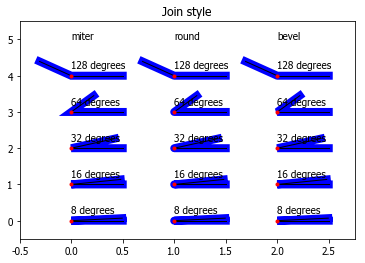

In [23]:
#Join styles

#Illustrate the three different join styles

import numpy as np
import matplotlib.pyplot as plt


def plot_angle(ax, x, y, angle, style):
    phi = np.radians(angle)
    xx = [x + .5, x, x + .5*np.cos(phi)]
    yy = [y, y, y + .5*np.sin(phi)]
    ax.plot(xx, yy, lw=8, color='blue', solid_joinstyle=style)
    ax.plot(xx[1:], yy[1:], lw=1, color='black')
    ax.plot(xx[1::-1], yy[1::-1], lw=1, color='black')
    ax.plot(xx[1:2], yy[1:2], 'o', color='red', markersize=3)
    ax.text(x, y + .2, '%.0f degrees' % angle)

fig, ax = plt.subplots()
ax.set_title('Join style')

for x, style in enumerate((('miter', 'round', 'bevel'))):
    ax.text(x, 5, style)
    for i in range(5):
        plot_angle(ax, x, i, pow(2.0, 3 + i), style)

ax.set_xlim(-.5, 2.75)
ax.set_ylim(-.5, 5.5)
plt.show()

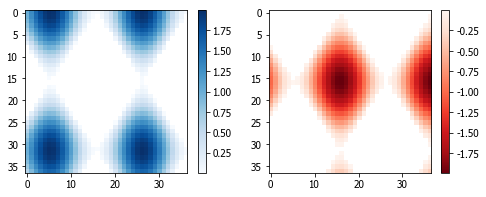

In [24]:
#Colorbar

#This example shows how to use colorbar by specifying the mappable object (here the imshow returned object) and the axes to attach the colorbar to.

import numpy as np
import matplotlib.pyplot as plt

# setup some generic data
N = 37
x, y = np.mgrid[:N, :N]
Z = (np.cos(x*0.2) + np.sin(y*0.3))

# mask out the negative and positve values, respectively
Zpos = np.ma.masked_less(Z, 0)
Zneg = np.ma.masked_greater(Z, 0)

fig, (ax1, ax2) = plt.subplots(figsize=(8, 3), ncols=2)

# plot just the positive data and save the
# color "mappable" object returned by ax1.imshow
pos = ax1.imshow(Zpos, cmap='Blues', interpolation='none')

# add the colorbar using the figure's method,
# telling which mappable we're talking about and
# which axes object it should be near
fig.colorbar(pos, ax=ax1)

# repeat everything above for the negative data
neg = ax2.imshow(Zneg, cmap='Reds_r', interpolation='none')
fig.colorbar(neg, ax=ax2)

plt.show()

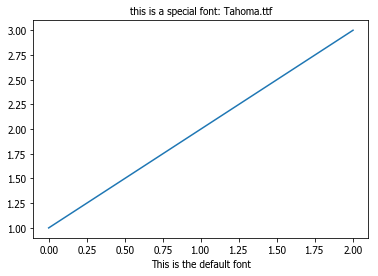

In [25]:
#Using a ttf font file in matplotlib

#Although it is usually not a good idea to explicitly point to a single ttf file for a font instance, you can do so using the font_manager.FontProperties fname argument (for a more flexible solution, see the font_family_rc.py and fonts_demo.py examples).

import sys
import os
import matplotlib.font_manager as fm

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot([1, 2, 3])

if sys.platform == 'win32':
    fpath = 'C:\\Windows\\Fonts\\Tahoma.ttf'
elif sys.platform.startswith('linux'):
    basedir = '/usr/share/fonts/truetype'
    fonts = ['freefont/FreeSansBoldOblique.ttf',
             'ttf-liberation/LiberationSans-BoldItalic.ttf',
             'msttcorefonts/Comic_Sans_MS.ttf']
    for fpath in fonts:
        if os.path.exists(os.path.join(basedir, fpath)):
            break
else:
    fpath = '/Library/Fonts/Tahoma.ttf'

if os.path.exists(fpath):
    prop = fm.FontProperties(fname=fpath)
    fname = os.path.split(fpath)[1]
    ax.set_title('this is a special font: %s' % fname, fontproperties=prop)
else:
    ax.set_title('Demo fails--cannot find a demo font')
ax.set_xlabel('This is the default font')

plt.show()

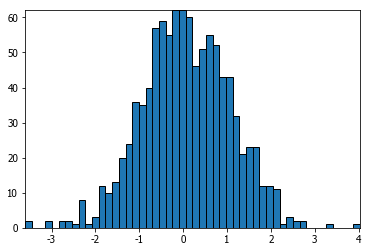

In [26]:
#Building histograms using Rectangles and PolyCollections

#This example shows how to use a path patch to draw a bunch of rectangles. 
#The technique of using lots of Rectangle instances, or the faster method of using PolyCollections, 
#were implemented before we had proper paths with moveto/lineto, closepoly etc in mpl. 
#Now that we have them, we can draw collections of regularly shaped objects with homogeneous properties more efficiently with a PathCollection. 
#This example makes a histogram – its more work to set up the vertex arrays at the outset, but it should be much faster for large numbers of objects

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path

fig, ax = plt.subplots()

# Fixing random state for reproducibility
np.random.seed(19680801)


# histogram our data with numpy

data = np.random.randn(1000)
n, bins = np.histogram(data, 50)

# get the corners of the rectangles for the histogram
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n


# we need a (numrects x numsides x 2) numpy array for the path helper
# function to build a compound path
XY = np.array([[left, left, right, right], [bottom, top, top, bottom]]).T

# get the Path object
barpath = path.Path.make_compound_path_from_polys(XY)

# make a patch out of it
patch = patches.PathPatch(barpath)
ax.add_patch(patch)

# update the view limits
ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())

plt.show()

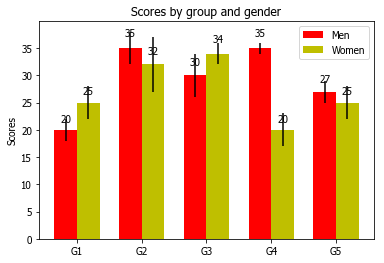

In [27]:
#Barchart

#A bar plot with errorbars and height labels on individual bars

import numpy as np
import matplotlib.pyplot as plt

N = 5
men_means = (20, 35, 30, 35, 27)
men_std = (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, men_means, width, color='r', yerr=men_std)

women_means = (25, 32, 34, 20, 25)
women_std = (3, 5, 2, 3, 3)
rects2 = ax.bar(ind + width, women_means, width, color='y', yerr=women_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

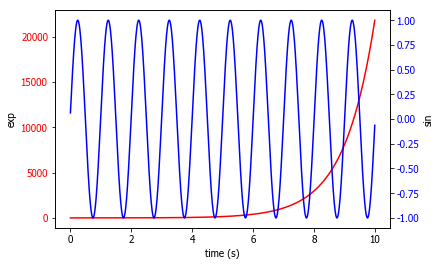

In [28]:
#Plots with different scales

import numpy as np
import matplotlib.pyplot as plt


def two_scales(ax1, time, data1, data2, c1, c2):
    """

    Parameters
    ----------
    ax : axis
        Axis to put two scales on

    time : array-like
        x-axis values for both datasets

    data1: array-like
        Data for left hand scale

    data2 : array-like
        Data for right hand scale

    c1 : color
        Color for line 1

    c2 : color
        Color for line 2

    Returns
    -------
    ax : axis
        Original axis
    ax2 : axis
        New twin axis
    """
    ax2 = ax1.twinx()

    ax1.plot(time, data1, color=c1)
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('exp')

    ax2.plot(time, data2, color=c2)
    ax2.set_ylabel('sin')
    return ax1, ax2


# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
s1 = np.exp(t)
s2 = np.sin(2 * np.pi * t)

# Create axes
fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, t, s1, s2, 'r', 'b')


# Change color of each axis
def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None
color_y_axis(ax1, 'r')
color_y_axis(ax2, 'b')
plt.show()

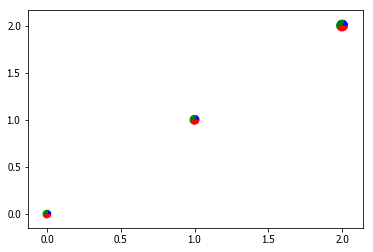

In [29]:
#Scatter plot with pie chart markers

#This example makes custom ‘pie charts’ as the markers for a scatter plot.
#Thanks to Manuel Metz for the example

import numpy as np
import matplotlib.pyplot as plt

# first define the ratios
r1 = 0.2       # 20%
r2 = r1 + 0.4  # 40%

# define some sizes of the scatter marker
sizes = np.array([60, 80, 120])

# calculate the points of the first pie marker
#
# these are just the origin (0,0) +
# some points on a circle cos,sin
x = [0] + np.cos(np.linspace(0, 2 * np.pi * r1, 10)).tolist()
y = [0] + np.sin(np.linspace(0, 2 * np.pi * r1, 10)).tolist()
xy1 = list(zip(x, y))
s1 = np.max(xy1)

x = [0] + np.cos(np.linspace(2 * np.pi * r1, 2 * np.pi * r2, 10)).tolist()
y = [0] + np.sin(np.linspace(2 * np.pi * r1, 2 * np.pi * r2, 10)).tolist()
xy2 = list(zip(x, y))
s2 = np.max(xy2)

x = [0] + np.cos(np.linspace(2 * np.pi * r2, 2 * np.pi, 10)).tolist()
y = [0] + np.sin(np.linspace(2 * np.pi * r2, 2 * np.pi, 10)).tolist()
xy3 = list(zip(x, y))
s3 = np.max(xy3)

fig, ax = plt.subplots()
ax.scatter(range(3), range(3), marker=(xy1, 0),
           s=s1 ** 2 * sizes, facecolor='blue')
ax.scatter(range(3), range(3), marker=(xy2, 0),
           s=s2 ** 2 * sizes, facecolor='green')
ax.scatter(range(3), range(3), marker=(xy3, 0),
           s=s3 ** 2 * sizes, facecolor='red')

plt.show()

In [31]:
#Labeling ticks using engineering notation

#Demo to show use of the engineering Formatter.

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import EngFormatter

# Fixing random state for reproducibility
prng = np.random.RandomState(19680801)

# Create artificial data to plot.
# The x data span over several decades to demonstrate several SI prefixes.
xs = np.logspace(1, 9, 100)
ys = (0.8 + 0.4 * prng.uniform(size=100)) * np.log10(xs)**2

# Figure width is doubled (2*6.4) to display nicely 2 subplots side by side.
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(7, 9.6))
for ax in (ax0, ax1):
    ax.set_xscale('log')

# Demo of the default settings, with a user-defined unit label.
ax0.set_title('Full unit ticklabels, w/ default precision & space separator')
formatter0 = EngFormatter(unit='Hz')
ax0.xaxis.set_major_formatter(formatter0)
ax0.plot(xs, ys)
ax0.set_xlabel('Frequency')

# Demo of the options `places` (number of digit after decimal point) and
# `sep` (separator between the number and the prefix/unit).
ax1.set_title('SI-prefix only ticklabels, 1-digit precision & '
              'thin space separator')
formatter1 = EngFormatter(places=1, sep=u"\N{THIN SPACE}")  # U+2009
ax1.xaxis.set_major_formatter(formatter1)
ax1.plot(xs, ys)
ax1.set_xlabel('Frequency [Hz]')

plt.tight_layout()
plt.show()

TypeError: __init__() got an unexpected keyword argument 'sep1'

In [32]:
#Custom tick formatter for time series

#When plotting time series, e.g., financial time series, one often wants to leave out days on which there is no data, 
#i.e. weekends. The example below shows how to use an ‘index formatter’ to achieve the desired plot

from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.ticker as ticker

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    r = np.load(datafile)['price_data'].view(np.recarray)
r = r[-30:]  # get the last 30 days
# Matplotlib works better with datetime.datetime than np.datetime64, but the
# latter is more portable.
date = r.date.astype('O')

# first we'll do it the default way, with gaps on weekends
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
ax = axes[0]
ax.plot(date, r.adj_close, 'o-')
ax.set_title("Default")
fig.autofmt_xdate()

# next we'll write a custom formatter
N = len(r)
ind = np.arange(N)  # the evenly spaced plot indices


def format_date(x, pos=None):
    thisind = np.clip(int(x + 0.5), 0, N - 1)
    return date[thisind].strftime('%Y-%m-%d')

ax = axes[1]
ax.plot(ind, r.adj_close, 'o-')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.set_title("Custom tick formatter")
fig.autofmt_xdate()

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Ken/Library/Python/3.6/lib/python/site-packages/matplotlib/mpl-data/sample_data/goog.npz'

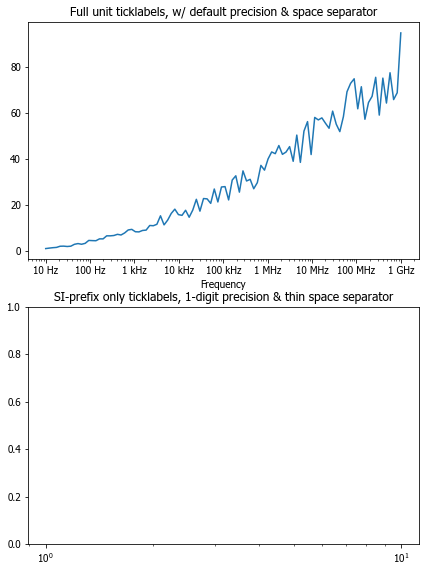

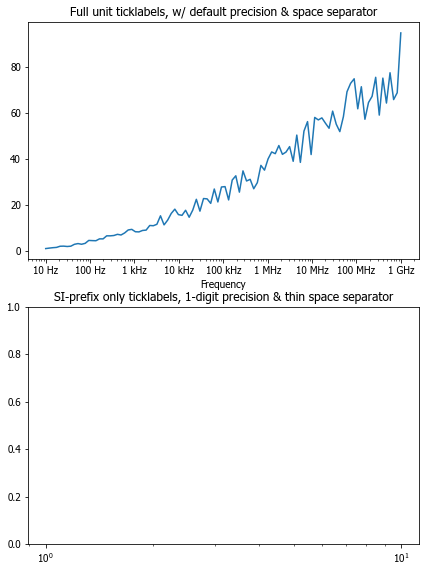

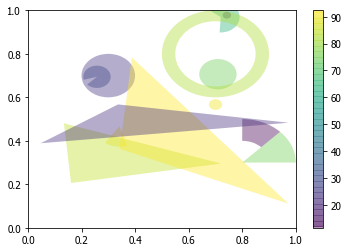

In [33]:
#Circles, Wedges and Polygons

#This example demonstrates how to use patch collections.

import numpy as np
import matplotlib
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, ax = plt.subplots()

resolution = 50  # the number of vertices
N = 3
x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
patches = []
for x1, y1, r in zip(x, y, radii):
    circle = Circle((x1, y1), r)
    patches.append(circle)

x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
theta1 = 360.0*np.random.rand(N)
theta2 = 360.0*np.random.rand(N)
for x1, y1, r, t1, t2 in zip(x, y, radii, theta1, theta2):
    wedge = Wedge((x1, y1), r, t1, t2)
    patches.append(wedge)

# Some limiting conditions on Wedge
patches += [
    Wedge((.3, .7), .1, 0, 360),             # Full circle
    Wedge((.7, .8), .2, 0, 360, width=0.05),  # Full ring
    Wedge((.8, .3), .2, 0, 45),              # Full sector
    Wedge((.8, .3), .2, 45, 90, width=0.10),  # Ring sector
]

for i in range(N):
    polygon = Polygon(np.random.rand(N, 2), True)
    patches.append(polygon)

colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.4)
p.set_array(np.array(colors))
ax.add_collection(p)
fig.colorbar(p, ax=ax)

plt.show()

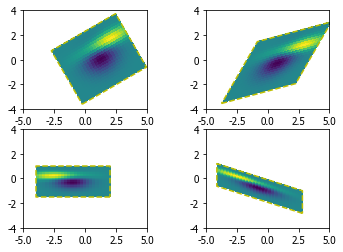

In [34]:
#Affine transform of an image

#For the backends that support draw_image with optional affine transform (e.g., agg, ps backend), 
#the image of the output should have its boundary match the dashed yellow rectangle.

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms


def get_image():
    delta = 0.25
    x = y = np.arange(-3.0, 3.0, delta)
    X, Y = np.meshgrid(x, y)
    Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
    Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
    Z = Z2 - Z1  # difference of Gaussians
    return Z


def do_plot(ax, Z, transform):
    im = ax.imshow(Z, interpolation='none',
                   origin='lower',
                   extent=[-2, 4, -3, 2], clip_on=True)

    trans_data = transform + ax.transData
    im.set_transform(trans_data)

    # display intended extent of the image
    x1, x2, y1, y2 = im.get_extent()
    ax.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], "y--",
            transform=trans_data)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-4, 4)


# prepare image and figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
Z = get_image()

# image rotation
do_plot(ax1, Z, mtransforms.Affine2D().rotate_deg(30))

# image skew
do_plot(ax2, Z, mtransforms.Affine2D().skew_deg(30, 15))

# scale and reflection
do_plot(ax3, Z, mtransforms.Affine2D().scale(-1, .5))

# everything and a translation
do_plot(ax4, Z, mtransforms.Affine2D().
        rotate_deg(30).skew_deg(30, 15).scale(-1, .5).translate(.5, -1))

plt.show()

In [35]:
#Date tick labels

'''
Show how to make date plots in matplotlib using date tick locators and formatters. 
See major_minor_demo1.py for more information on controlling major and minor ticks

All matplotlib date plotting is done by converting date instances into days since the 0001-01-01 UTC. 
The conversion, tick locating and formatting is done behind the scenes so this is most transparent to you. 
The dates module provides several converter functions date2num and num2date

'''


import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    r = np.load(datafile)['price_data'].view(np.recarray)
# Matplotlib works better with datetime.datetime than np.datetime64, but the
# latter is more portable.
date = r.date.astype('O')

fig, ax = plt.subplots()
ax.plot(date, r.adj_close)


# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

datemin = datetime.date(date.min().year, 1, 1)
datemax = datetime.date(date.max().year + 1, 1, 1)
ax.set_xlim(datemin, datemax)


# format the coords message box
def price(x):
    return '$%1.2f' % x
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = price
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Ken/Library/Python/3.6/lib/python/site-packages/matplotlib/mpl-data/sample_data/goog.npz'

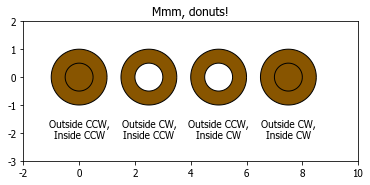

In [36]:
#Mmh Donuts!!!

#This example draws donuts (miam!) using Path and Patches.

import numpy as np
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


def wise(v):
    if v == 1:
        return "CCW"
    else:
        return "CW"


def make_circle(r):
    t = np.arange(0, np.pi * 2.0, 0.01)
    t = t.reshape((len(t), 1))
    x = r * np.cos(t)
    y = r * np.sin(t)
    return np.hstack((x, y))

Path = mpath.Path

fig, ax = plt.subplots()

inside_vertices = make_circle(0.5)
outside_vertices = make_circle(1.0)
codes = np.ones(
    len(inside_vertices), dtype=mpath.Path.code_type) * mpath.Path.LINETO
codes[0] = mpath.Path.MOVETO

for i, (inside, outside) in enumerate(((1, 1), (1, -1), (-1, 1), (-1, -1))):
    # Concatenate the inside and outside subpaths together, changing their
    # order as needed
    vertices = np.concatenate((outside_vertices[::outside],
                               inside_vertices[::inside]))
    # Shift the path
    vertices[:, 0] += i * 2.5
    # The codes will be all "LINETO" commands, except for "MOVETO"s at the
    # beginning of each subpath
    all_codes = np.concatenate((codes, codes))
    # Create the Path object
    path = mpath.Path(vertices, all_codes)
    # Add plot it
    patch = mpatches.PathPatch(path, facecolor='#885500', edgecolor='black')
    ax.add_patch(patch)

    ax.annotate("Outside %s,\nInside %s" % (wise(outside), wise(inside)),
                (i * 2.5, -1.5), va="top", ha="center")

ax.set_xlim(-2, 10)
ax.set_ylim(-3, 2)
ax.set_title('Mmm, donuts!')
ax.set_aspect(1.0)
plt.show()

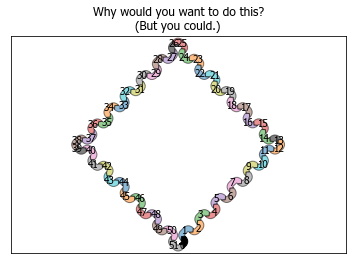

In [37]:
#Long chain of connections using Sankey

#Demonstrate/test the Sankey class by producing a long chain of connections.

from itertools import cycle

import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

links_per_side = 6


def side(sankey, n=1):
    """Generate a side chain."""
    prior = len(sankey.diagrams)
    for i in range(0, 2*n, 2):
        sankey.add(flows=[1, -1], orientations=[-1, -1],
                   patchlabel=str(prior + i),
                   prior=prior + i - 1, connect=(1, 0), alpha=0.5)
        sankey.add(flows=[1, -1], orientations=[1, 1],
                   patchlabel=str(prior + i + 1),
                   prior=prior + i, connect=(1, 0), alpha=0.5)


def corner(sankey):
    """Generate a corner link."""
    prior = len(sankey.diagrams)
    sankey.add(flows=[1, -1], orientations=[0, 1],
               patchlabel=str(prior), facecolor='k',
               prior=prior - 1, connect=(1, 0), alpha=0.5)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                     title="Why would you want to do this?\n(But you could.)")
sankey = Sankey(ax=ax, unit=None)
sankey.add(flows=[1, -1], orientations=[0, 1],
           patchlabel="0", facecolor='k',
           rotation=45)
side(sankey, n=links_per_side)
corner(sankey)
side(sankey, n=links_per_side)
corner(sankey)
side(sankey, n=links_per_side)
corner(sankey)
side(sankey, n=links_per_side)
sankey.finish()
# Notice:
# 1. The alignment doesn't drift significantly (if at all; with 16007
#    subdiagrams there is still closure).
# 2. The first diagram is rotated 45 deg, so all other diagrams are rotated
#    accordingly.

plt.show()

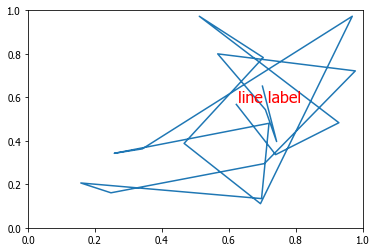

In [38]:
#Artist within an artist

#Show how to override basic methods so an artist can contain another artist. 
#In this case, the line contains a Text instance to label it.

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib.transforms as mtransforms
import matplotlib.text as mtext


class MyLine(lines.Line2D):
    def __init__(self, *args, **kwargs):
        # we'll update the position when the line data is set
        self.text = mtext.Text(0, 0, '')
        lines.Line2D.__init__(self, *args, **kwargs)

        # we can't access the label attr until *after* the line is
        # inited
        self.text.set_text(self.get_label())

    def set_figure(self, figure):
        self.text.set_figure(figure)
        lines.Line2D.set_figure(self, figure)

    def set_axes(self, axes):
        self.text.set_axes(axes)
        lines.Line2D.set_axes(self, axes)

    def set_transform(self, transform):
        # 2 pixel offset
        texttrans = transform + mtransforms.Affine2D().translate(2, 2)
        self.text.set_transform(texttrans)
        lines.Line2D.set_transform(self, transform)

    def set_data(self, x, y):
        if len(x):
            self.text.set_position((x[-1], y[-1]))

        lines.Line2D.set_data(self, x, y)

    def draw(self, renderer):
        # draw my label at the end of the line with 2 pixel offset
        lines.Line2D.draw(self, renderer)
        self.text.draw(renderer)

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, ax = plt.subplots()
x, y = np.random.rand(2, 20)
line = MyLine(x, y, mfc='red', ms=12, label='line label')
#line.text.set_text('line label')
line.text.set_color('red')
line.text.set_fontsize(16)


ax.add_line(line)


plt.show()

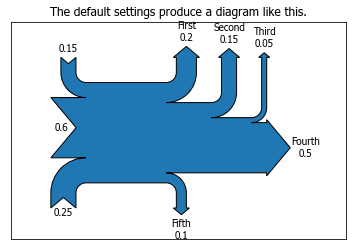

In [39]:
#The Sankey class

#Demonstrate the Sankey class by producing three basic diagrams.

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.sankey import Sankey


#Example 1 – Mostly defaults

#This demonstrates how to create a simple diagram by implicitly calling the Sankey.
#add() method and by appending finish() to the call to the class.

Sankey(flows=[0.25, 0.15, 0.60, -0.20, -0.15, -0.05, -0.50, -0.10],
       labels=['', '', '', 'First', 'Second', 'Third', 'Fourth', 'Fifth'],
       orientations=[-1, 1, 0, 1, 1, 1, 0, -1]).finish()
plt.title("The default settings produce a diagram like this.")

plt.show()

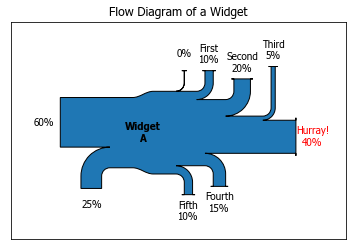

In [40]:
#Example 2

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                     title="Flow Diagram of a Widget")
sankey = Sankey(ax=ax, scale=0.01, offset=0.2, head_angle=180,
                format='%.0f', unit='%')
sankey.add(flows=[25, 0, 60, -10, -20, -5, -15, -10, -40],
           labels=['', '', '', 'First', 'Second', 'Third', 'Fourth',
                   'Fifth', 'Hurray!'],
           orientations=[-1, 1, 0, 1, 1, 1, -1, -1, 0],
           pathlengths=[0.25, 0.25, 0.25, 0.25, 0.25, 0.6, 0.25, 0.25,
                        0.25],
           patchlabel="Widget\nA")  # Arguments to matplotlib.patches.PathPatch()
diagrams = sankey.finish()
diagrams[0].texts[-1].set_color('r')
diagrams[0].text.set_fontweight('bold')

plt.show()

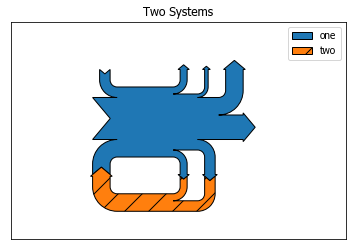

In [41]:
#Example 3

#This demonstrates:
#Connecting two systems
#Turning off the labels of the quantities
#Adding a legend

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[], title="Two Systems")
flows = [0.25, 0.15, 0.60, -0.10, -0.05, -0.25, -0.15, -0.10, -0.35]
sankey = Sankey(ax=ax, unit=None)
sankey.add(flows=flows, label='one',
           orientations=[-1, 1, 0, 1, 1, 1, -1, -1, 0])
sankey.add(flows=[-0.25, 0.15, 0.1], label='two',
           orientations=[-1, -1, -1], prior=0, connect=(0, 0))
diagrams = sankey.finish()
diagrams[-1].patch.set_hatch('/')
plt.legend(loc='best')

plt.show()

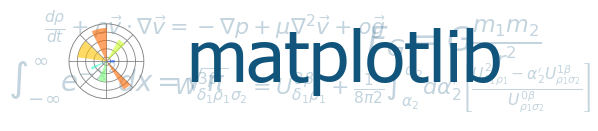

In [42]:
#Matplotlib Logos

#Displays some matplotlib logos.

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.edgecolor'] = 'gray'


axalpha = 0.05
figcolor = 'white'
dpi = 80
fig = plt.figure(figsize=(6, 1.1), dpi=dpi)
fig.patch.set_edgecolor(figcolor)
fig.patch.set_facecolor(figcolor)


def add_math_background():
    ax = fig.add_axes([0., 0., 1., 1.])

    text = []
    text.append(
        (r"$W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = "
         r"U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2}"
         r"\int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 "
         r"\left[\frac{ U^{2\beta}_{\delta_1 \rho_1} - "
         r"\alpha^\prime_2U^{1\beta}_{\rho_1 \sigma_2} "
         r"}{U^{0\beta}_{\rho_1 \sigma_2}}\right]$", (0.7, 0.2), 20))
    text.append((r"$\frac{d\rho}{d t} + \rho \vec{v}\cdot\nabla\vec{v} "
                 r"= -\nabla p + \mu\nabla^2 \vec{v} + \rho \vec{g}$",
                 (0.35, 0.9), 20))
    text.append((r"$\int_{-\infty}^\infty e^{-x^2}dx=\sqrt{\pi}$",
                 (0.15, 0.3), 25))
    text.append((r"$F_G = G\frac{m_1m_2}{r^2}$",
                 (0.85, 0.7), 30))
    for eq, (x, y), size in text:
        ax.text(x, y, eq, ha='center', va='center', color="#11557c",
                alpha=0.25, transform=ax.transAxes, fontsize=size)
    ax.set_axis_off()
    return ax


def add_matplotlib_text(ax):
    ax.text(0.95, 0.5, 'matplotlib', color='#11557c', fontsize=65,
            ha='right', va='center', alpha=1.0, transform=ax.transAxes)


def add_polar_bar():
    ax = fig.add_axes([0.025, 0.075, 0.2, 0.85], projection='polar')

    ax.patch.set_alpha(axalpha)
    ax.set_axisbelow(True)
    N = 7
    arc = 2. * np.pi
    theta = np.arange(0.0, arc, arc/N)
    radii = 10 * np.array([0.2, 0.6, 0.8, 0.7, 0.4, 0.5, 0.8])
    width = np.pi / 4 * np.array([0.4, 0.4, 0.6, 0.8, 0.2, 0.5, 0.3])
    bars = ax.bar(theta, radii, width=width, bottom=0.0)
    for r, bar in zip(radii, bars):
        bar.set_facecolor(cm.jet(r/10.))
        bar.set_alpha(0.6)

    ax.tick_params(labelbottom=False, labeltop=False,
                   labelleft=False, labelright=False)

    ax.grid(lw=0.8, alpha=0.9, ls='-', color='0.5')

    ax.set_yticks(np.arange(1, 9, 2))
    ax.set_rmax(9)


if __name__ == '__main__':
    main_axes = add_math_background()
    add_polar_bar()
    add_matplotlib_text(main_axes)
    plt.show()

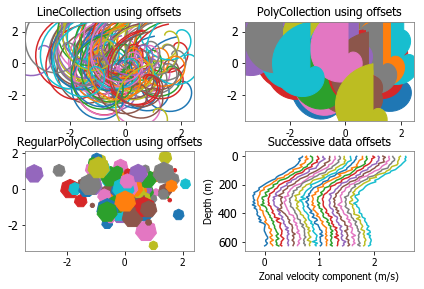

In [43]:
#Line, Poly and RegularPoly Collection with autoscaling

import matplotlib.pyplot as plt
from matplotlib import collections, colors, transforms
import numpy as np

nverts = 50
npts = 100

# Make some spirals
r = np.arange(nverts)
theta = np.linspace(0, 2*np.pi, nverts)
xx = r * np.sin(theta)
yy = r * np.cos(theta)
spiral = list(zip(xx, yy))

# Make some offsets
# Fixing random state for reproducibility
rs = np.random.RandomState(19680801)


xo = rs.randn(npts)
yo = rs.randn(npts)
xyo = list(zip(xo, yo))

# Make a list of colors cycling through the default series.
colors = [colors.to_rgba(c)
          for c in plt.rcParams['axes.prop_cycle'].by_key()['color']]

fig, axes = plt.subplots(2, 2)
fig.subplots_adjust(top=0.92, left=0.07, right=0.97,
                    hspace=0.3, wspace=0.3)
((ax1, ax2), (ax3, ax4)) = axes  # unpack the axes


col = collections.LineCollection([spiral], offsets=xyo,
                                 transOffset=ax1.transData)
trans = fig.dpi_scale_trans + transforms.Affine2D().scale(1.0/72.0)
col.set_transform(trans)  # the points to pixels transform
# Note: the first argument to the collection initializer
# must be a list of sequences of x,y tuples; we have only
# one sequence, but we still have to put it in a list.
ax1.add_collection(col, autolim=True)
# autolim=True enables autoscaling.  For collections with
# offsets like this, it is neither efficient nor accurate,
# but it is good enough to generate a plot that you can use
# as a starting point.  If you know beforehand the range of
# x and y that you want to show, it is better to set them
# explicitly, leave out the autolim kwarg (or set it to False),
# and omit the 'ax1.autoscale_view()' call below.

# Make a transform for the line segments such that their size is
# given in points:
col.set_color(colors)

ax1.autoscale_view()  # See comment above, after ax1.add_collection.
ax1.set_title('LineCollection using offsets')


# The same data as above, but fill the curves.
col = collections.PolyCollection([spiral], offsets=xyo,
                                 transOffset=ax2.transData)
trans = transforms.Affine2D().scale(fig.dpi/72.0)
col.set_transform(trans)  # the points to pixels transform
ax2.add_collection(col, autolim=True)
col.set_color(colors)


ax2.autoscale_view()
ax2.set_title('PolyCollection using offsets')

# 7-sided regular polygons

col = collections.RegularPolyCollection(
    7, sizes=np.abs(xx) * 10.0, offsets=xyo, transOffset=ax3.transData)
trans = transforms.Affine2D().scale(fig.dpi / 72.0)
col.set_transform(trans)  # the points to pixels transform
ax3.add_collection(col, autolim=True)
col.set_color(colors)
ax3.autoscale_view()
ax3.set_title('RegularPolyCollection using offsets')


# Simulate a series of ocean current profiles, successively
# offset by 0.1 m/s so that they form what is sometimes called
# a "waterfall" plot or a "stagger" plot.

nverts = 60
ncurves = 20
offs = (0.1, 0.0)

yy = np.linspace(0, 2*np.pi, nverts)
ym = np.max(yy)
xx = (0.2 + (ym - yy)/ym)**2 * np.cos(yy - 0.4)*0.5
segs = []
for i in range(ncurves):
    xxx = xx + 0.02*rs.randn(nverts)
    curve = list(zip(xxx, yy*100))
    segs.append(curve)

col = collections.LineCollection(segs, offsets=offs)
ax4.add_collection(col, autolim=True)
col.set_color(colors)
ax4.autoscale_view()
ax4.set_title('Successive data offsets')
ax4.set_xlabel('Zonal velocity component (m/s)')
ax4.set_ylabel('Depth (m)')
# Reverse the y-axis so depth increases downward
ax4.set_ylim(ax4.get_ylim()[::-1])


plt.show()

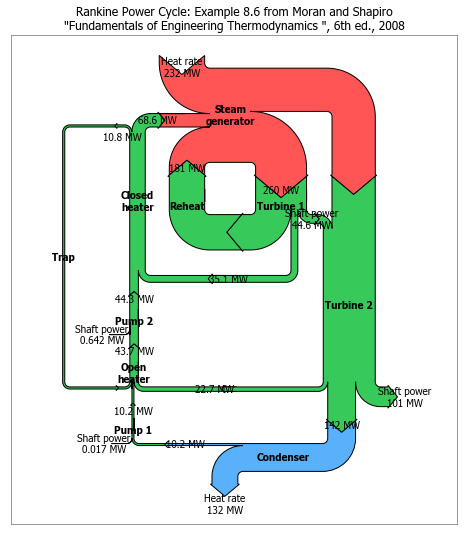

In [44]:
#Rankine power cycle

#Demonstrate the Sankey class with a practical example of a Rankine power cycle.

import matplotlib.pyplot as plt

from matplotlib.sankey import Sankey

fig = plt.figure(figsize=(8, 9))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                     title="Rankine Power Cycle: Example 8.6 from Moran and "
                     "Shapiro\n\x22Fundamentals of Engineering Thermodynamics "
                     "\x22, 6th ed., 2008")
Hdot = [260.431, 35.078, 180.794, 221.115, 22.700,
        142.361, 10.193, 10.210, 43.670, 44.312,
        68.631, 10.758, 10.758, 0.017, 0.642,
        232.121, 44.559, 100.613, 132.168]  # MW
sankey = Sankey(ax=ax, format='%.3G', unit=' MW', gap=0.5, scale=1.0/Hdot[0])
sankey.add(patchlabel='\n\nPump 1', rotation=90, facecolor='#37c959',
           flows=[Hdot[13], Hdot[6], -Hdot[7]],
           labels=['Shaft power', '', None],
           pathlengths=[0.4, 0.883, 0.25],
           orientations=[1, -1, 0])
sankey.add(patchlabel='\n\nOpen\nheater', facecolor='#37c959',
           flows=[Hdot[11], Hdot[7], Hdot[4], -Hdot[8]],
           labels=[None, '', None, None],
           pathlengths=[0.25, 0.25, 1.93, 0.25],
           orientations=[1, 0, -1, 0], prior=0, connect=(2, 1))
sankey.add(patchlabel='\n\nPump 2', facecolor='#37c959',
           flows=[Hdot[14], Hdot[8], -Hdot[9]],
           labels=['Shaft power', '', None],
           pathlengths=[0.4, 0.25, 0.25],
           orientations=[1, 0, 0], prior=1, connect=(3, 1))
sankey.add(patchlabel='Closed\nheater', trunklength=2.914, fc='#37c959',
           flows=[Hdot[9], Hdot[1], -Hdot[11], -Hdot[10]],
           pathlengths=[0.25, 1.543, 0.25, 0.25],
           labels=['', '', None, None],
           orientations=[0, -1, 1, -1], prior=2, connect=(2, 0))
sankey.add(patchlabel='Trap', facecolor='#37c959', trunklength=5.102,
           flows=[Hdot[11], -Hdot[12]],
           labels=['\n', None],
           pathlengths=[1.0, 1.01],
           orientations=[1, 1], prior=3, connect=(2, 0))
sankey.add(patchlabel='Steam\ngenerator', facecolor='#ff5555',
           flows=[Hdot[15], Hdot[10], Hdot[2], -Hdot[3], -Hdot[0]],
           labels=['Heat rate', '', '', None, None],
           pathlengths=0.25,
           orientations=[1, 0, -1, -1, -1], prior=3, connect=(3, 1))
sankey.add(patchlabel='\n\n\nTurbine 1', facecolor='#37c959',
           flows=[Hdot[0], -Hdot[16], -Hdot[1], -Hdot[2]],
           labels=['', None, None, None],
           pathlengths=[0.25, 0.153, 1.543, 0.25],
           orientations=[0, 1, -1, -1], prior=5, connect=(4, 0))
sankey.add(patchlabel='\n\n\nReheat', facecolor='#37c959',
           flows=[Hdot[2], -Hdot[2]],
           labels=[None, None],
           pathlengths=[0.725, 0.25],
           orientations=[-1, 0], prior=6, connect=(3, 0))
sankey.add(patchlabel='Turbine 2', trunklength=3.212, facecolor='#37c959',
           flows=[Hdot[3], Hdot[16], -Hdot[5], -Hdot[4], -Hdot[17]],
           labels=[None, 'Shaft power', None, '', 'Shaft power'],
           pathlengths=[0.751, 0.15, 0.25, 1.93, 0.25],
           orientations=[0, -1, 0, -1, 1], prior=6, connect=(1, 1))
sankey.add(patchlabel='Condenser', facecolor='#58b1fa', trunklength=1.764,
           flows=[Hdot[5], -Hdot[18], -Hdot[6]],
           labels=['', 'Heat rate', None],
           pathlengths=[0.45, 0.25, 0.883],
           orientations=[-1, 1, 0], prior=8, connect=(2, 0))
diagrams = sankey.finish()
for diagram in diagrams:
    diagram.text.set_fontweight('bold')
    diagram.text.set_fontsize('10')
    for text in diagram.texts:
        text.set_fontsize('10')
# Notice that the explicit connections are handled automatically, but the
# implicit ones currently are not.  The lengths of the paths and the trunks
# must be adjusted manually, and that is a bit tricky.

plt.show()

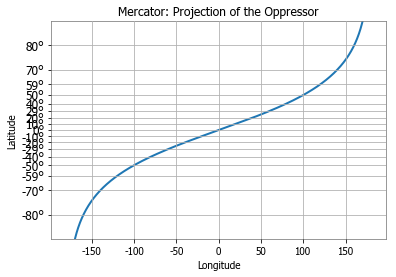

In [45]:
#Custom scale

#This example showcases how to create a custom scale, 
#by implementing the scaling use for latitude data in a Mercator Projection.

from __future__ import unicode_literals

import numpy as np
from numpy import ma
from matplotlib import scale as mscale
from matplotlib import transforms as mtransforms
from matplotlib.ticker import Formatter, FixedLocator
from matplotlib import rcParams


# BUG: this example fails with any other setting of axisbelow
rcParams['axes.axisbelow'] = False


class MercatorLatitudeScale(mscale.ScaleBase):
    """
    Scales data in range -pi/2 to pi/2 (-90 to 90 degrees) using
    the system used to scale latitudes in a Mercator projection.

    The scale function:
      ln(tan(y) + sec(y))

    The inverse scale function:
      atan(sinh(y))

    Since the Mercator scale tends to infinity at +/- 90 degrees,
    there is user-defined threshold, above and below which nothing
    will be plotted.  This defaults to +/- 85 degrees.

    source:
    http://en.wikipedia.org/wiki/Mercator_projection
    """

    # The scale class must have a member ``name`` that defines the
    # string used to select the scale.  For example,
    # ``gca().set_yscale("mercator")`` would be used to select this
    # scale.
    name = 'mercator'

    def __init__(self, axis, **kwargs):
        """
        Any keyword arguments passed to ``set_xscale`` and
        ``set_yscale`` will be passed along to the scale's
        constructor.

        thresh: The degree above which to crop the data.
        """
        mscale.ScaleBase.__init__(self)
        thresh = kwargs.pop("thresh", np.radians(85))
        if thresh >= np.pi / 2.0:
            raise ValueError("thresh must be less than pi/2")
        self.thresh = thresh

    def get_transform(self):
        """
        Override this method to return a new instance that does the
        actual transformation of the data.

        The MercatorLatitudeTransform class is defined below as a
        nested class of this one.
        """
        return self.MercatorLatitudeTransform(self.thresh)

    def set_default_locators_and_formatters(self, axis):
        """
        Override to set up the locators and formatters to use with the
        scale.  This is only required if the scale requires custom
        locators and formatters.  Writing custom locators and
        formatters is rather outside the scope of this example, but
        there are many helpful examples in ``ticker.py``.

        In our case, the Mercator example uses a fixed locator from
        -90 to 90 degrees and a custom formatter class to put convert
        the radians to degrees and put a degree symbol after the
        value::
        """
        class DegreeFormatter(Formatter):
            def __call__(self, x, pos=None):
                return "%d\N{DEGREE SIGN}" % np.degrees(x)

        axis.set_major_locator(FixedLocator(
            np.radians(np.arange(-90, 90, 10))))
        axis.set_major_formatter(DegreeFormatter())
        axis.set_minor_formatter(DegreeFormatter())

    def limit_range_for_scale(self, vmin, vmax, minpos):
        """
        Override to limit the bounds of the axis to the domain of the
        transform.  In the case of Mercator, the bounds should be
        limited to the threshold that was passed in.  Unlike the
        autoscaling provided by the tick locators, this range limiting
        will always be adhered to, whether the axis range is set
        manually, determined automatically or changed through panning
        and zooming.
        """
        return max(vmin, -self.thresh), min(vmax, self.thresh)

    class MercatorLatitudeTransform(mtransforms.Transform):
        # There are two value members that must be defined.
        # ``input_dims`` and ``output_dims`` specify number of input
        # dimensions and output dimensions to the transformation.
        # These are used by the transformation framework to do some
        # error checking and prevent incompatible transformations from
        # being connected together.  When defining transforms for a
        # scale, which are, by definition, separable and have only one
        # dimension, these members should always be set to 1.
        input_dims = 1
        output_dims = 1
        is_separable = True
        has_inverse = True

        def __init__(self, thresh):
            mtransforms.Transform.__init__(self)
            self.thresh = thresh

        def transform_non_affine(self, a):
            """
            This transform takes an Nx1 ``numpy`` array and returns a
            transformed copy.  Since the range of the Mercator scale
            is limited by the user-specified threshold, the input
            array must be masked to contain only valid values.
            ``matplotlib`` will handle masked arrays and remove the
            out-of-range data from the plot.  Importantly, the
            ``transform`` method *must* return an array that is the
            same shape as the input array, since these values need to
            remain synchronized with values in the other dimension.
            """
            masked = ma.masked_where((a < -self.thresh) | (a > self.thresh), a)
            if masked.mask.any():
                return ma.log(np.abs(ma.tan(masked) + 1.0 / ma.cos(masked)))
            else:
                return np.log(np.abs(np.tan(a) + 1.0 / np.cos(a)))

        def inverted(self):
            """
            Override this method so matplotlib knows how to get the
            inverse transform for this transform.
            """
            return MercatorLatitudeScale.InvertedMercatorLatitudeTransform(
                self.thresh)

    class InvertedMercatorLatitudeTransform(mtransforms.Transform):
        input_dims = 1
        output_dims = 1
        is_separable = True
        has_inverse = True

        def __init__(self, thresh):
            mtransforms.Transform.__init__(self)
            self.thresh = thresh

        def transform_non_affine(self, a):
            return np.arctan(np.sinh(a))

        def inverted(self):
            return MercatorLatitudeScale.MercatorLatitudeTransform(self.thresh)

# Now that the Scale class has been defined, it must be registered so
# that ``matplotlib`` can find it.
mscale.register_scale(MercatorLatitudeScale)


if __name__ == '__main__':
    import matplotlib.pyplot as plt

    t = np.arange(-180.0, 180.0, 0.1)
    s = np.radians(t)/2.

    plt.plot(t, s, '-', lw=2)
    plt.gca().set_yscale('mercator')

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Mercator: Projection of the Oppressor')
    plt.grid(True)

    plt.show()

{}
{'facecolor': '#1f77b4', 'hatch': '/'}
{'facecolor': '#1f77b4', 'hatch': '/'}
v
{'facecolor': '#ff7f0e', 'hatch': '*'}
{'facecolor': '#ff7f0e', 'hatch': '*'}
v
{'facecolor': '#2ca02c', 'hatch': '+'}
{'facecolor': '#2ca02c', 'hatch': '+'}
v
{'facecolor': '#d62728', 'hatch': '|'}
{'facecolor': '#d62728', 'hatch': '|'}
v
{'edgecolor': 'w', 'orientation': 'h'}
{'facecolor': '#1f77b4'}
{'facecolor': '#1f77b4', 'edgecolor': 'w', 'orientation': 'h'}
h
{'facecolor': '#ff7f0e'}
{'facecolor': '#ff7f0e', 'edgecolor': 'w', 'orientation': 'h'}
h
{'facecolor': '#2ca02c'}
{'facecolor': '#2ca02c', 'edgecolor': 'w', 'orientation': 'h'}
h
{'facecolor': '#d62728'}
{'facecolor': '#d62728', 'edgecolor': 'w', 'orientation': 'h'}
h
{}
{'facecolor': '#1f77b4', 'hatch': '/'}
{'facecolor': '#1f77b4', 'hatch': '/'}
v
{'facecolor': '#ff7f0e', 'hatch': '*'}
{'facecolor': '#ff7f0e', 'hatch': '*'}
v
{'facecolor': '#2ca02c', 'hatch': '+'}
{'facecolor': '#2ca02c', 'hatch': '+'}
v
{'facecolor': '#d62728', 'hatch': '

/Users/Ken/Library/Python/3.6/lib/python/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


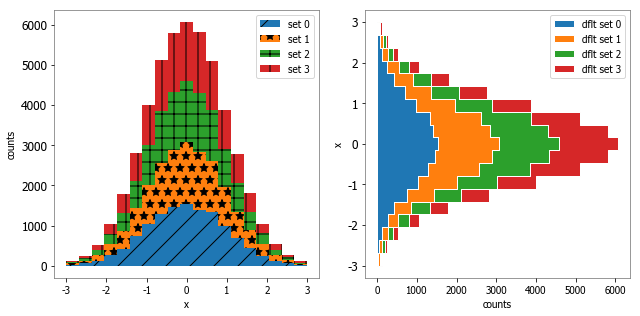

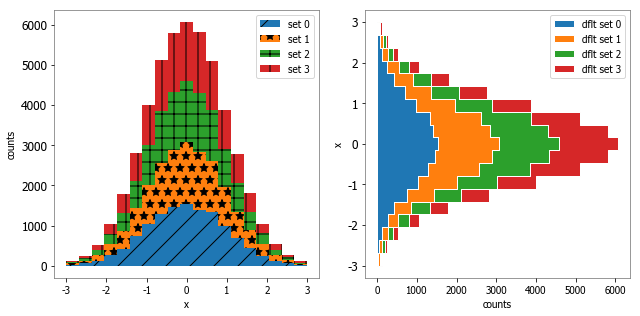

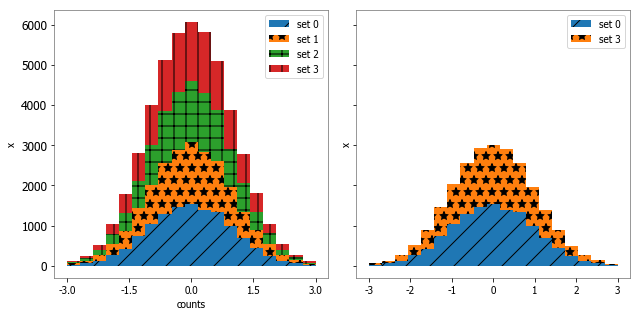

In [48]:
#Hatch-filled histograms

#This example showcases the hatching capabilities of matplotlib by plotting various histograms.

import itertools
from collections import OrderedDict
from functools import partial

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cycler import cycler
from six.moves import zip


def filled_hist(ax, edges, values, bottoms=None, orientation='v',
                **kwargs):
    """
    Draw a histogram as a stepped patch.

    Extra kwargs are passed through to `fill_between`

    Parameters
    ----------
    ax : Axes
        The axes to plot to

    edges : array
        A length n+1 array giving the left edges of each bin and the
        right edge of the last bin.

    values : array
        A length n array of bin counts or values

    bottoms : scalar or array, optional
        A length n array of the bottom of the bars.  If None, zero is used.

    orientation : {'v', 'h'}
       Orientation of the histogram.  'v' (default) has
       the bars increasing in the positive y-direction.

    Returns
    -------
    ret : PolyCollection
        Artist added to the Axes
    """
    print(orientation)
    if orientation not in set('hv'):
        raise ValueError("orientation must be in {{'h', 'v'}} "
                         "not {o}".format(o=orientation))

    kwargs.setdefault('step', 'post')
    edges = np.asarray(edges)
    values = np.asarray(values)
    if len(edges) - 1 != len(values):
        raise ValueError('Must provide one more bin edge than value not: '
                         'len(edges): {lb} len(values): {lv}'.format(
                             lb=len(edges), lv=len(values)))

    if bottoms is None:
        bottoms = np.zeros_like(values)
    if np.isscalar(bottoms):
        bottoms = np.ones_like(values) * bottoms

    values = np.r_[values, values[-1]]
    bottoms = np.r_[bottoms, bottoms[-1]]
    if orientation == 'h':
        return ax.fill_betweenx(edges, values, bottoms,
                                **kwargs)
    elif orientation == 'v':
        return ax.fill_between(edges, values, bottoms,
                               **kwargs)
    else:
        raise AssertionError("you should never be here")


def stack_hist(ax, stacked_data, sty_cycle, bottoms=None,
               hist_func=None, labels=None,
               plot_func=None, plot_kwargs=None):
    """
    ax : axes.Axes
        The axes to add artists too

    stacked_data : array or Mapping
        A (N, M) shaped array.  The first dimension will be iterated over to
        compute histograms row-wise

    sty_cycle : Cycler or operable of dict
        Style to apply to each set

    bottoms : array, optional
        The initial positions of the bottoms, defaults to 0

    hist_func : callable, optional
        Must have signature `bin_vals, bin_edges = f(data)`.
        `bin_edges` expected to be one longer than `bin_vals`

    labels : list of str, optional
        The label for each set.

        If not given and stacked data is an array defaults to 'default set {n}'

        If stacked_data is a mapping, and labels is None, default to the keys
        (which may come out in a random order).

        If stacked_data is a mapping and labels is given then only
        the columns listed by be plotted.

    plot_func : callable, optional
        Function to call to draw the histogram must have signature:

          ret = plot_func(ax, edges, top, bottoms=bottoms,
                          label=label, **kwargs)

    plot_kwargs : dict, optional
        Any extra kwargs to pass through to the plotting function.  This
        will be the same for all calls to the plotting function and will
        over-ride the values in cycle.

    Returns
    -------
    arts : dict
        Dictionary of artists keyed on their labels
    """
    # deal with default binning function
    if hist_func is None:
        hist_func = np.histogram

    # deal with default plotting function
    if plot_func is None:
        plot_func = filled_hist

    # deal with default
    if plot_kwargs is None:
        plot_kwargs = {}
    print(plot_kwargs)
    try:
        l_keys = stacked_data.keys()
        label_data = True
        if labels is None:
            labels = l_keys

    except AttributeError:
        label_data = False
        if labels is None:
            labels = itertools.repeat(None)

    if label_data:
        loop_iter = enumerate((stacked_data[lab], lab, s) for lab, s in
                              zip(labels, sty_cycle))
    else:
        loop_iter = enumerate(zip(stacked_data, labels, sty_cycle))

    arts = {}
    for j, (data, label, sty) in loop_iter:
        if label is None:
            label = 'dflt set {n}'.format(n=j)
        label = sty.pop('label', label)
        vals, edges = hist_func(data)
        if bottoms is None:
            bottoms = np.zeros_like(vals)
        top = bottoms + vals
        print(sty)
        sty.update(plot_kwargs)
        print(sty)
        ret = plot_func(ax, edges, top, bottoms=bottoms,
                        label=label, **sty)
        bottoms = top
        arts[label] = ret
    ax.legend(fontsize=10)
    return arts


# set up histogram function to fixed bins
edges = np.linspace(-3, 3, 20, endpoint=True)
hist_func = partial(np.histogram, bins=edges)

# set up style cycles
color_cycle = cycler(facecolor=plt.rcParams['axes.prop_cycle'][:4])
label_cycle = cycler('label', ['set {n}'.format(n=n) for n in range(4)])
hatch_cycle = cycler('hatch', ['/', '*', '+', '|'])

# Fixing random state for reproducibility
np.random.seed(19680801)

stack_data = np.random.randn(4, 12250)
dict_data = OrderedDict(zip((c['label'] for c in label_cycle), stack_data))

#Work with plain arrays

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4.5), tight_layout=True)
arts = stack_hist(ax1, stack_data, color_cycle + label_cycle + hatch_cycle,
                  hist_func=hist_func)

arts = stack_hist(ax2, stack_data, color_cycle,
                  hist_func=hist_func,
                  plot_kwargs=dict(edgecolor='w', orientation='h'))
ax1.set_ylabel('counts')
ax1.set_xlabel('x')
ax2.set_xlabel('counts')
ax2.set_ylabel('x')


#Work with labeled data

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4.5),
                               tight_layout=True, sharey=True)

arts = stack_hist(ax1, dict_data, color_cycle + hatch_cycle,
                  hist_func=hist_func)

arts = stack_hist(ax2, dict_data, color_cycle + hatch_cycle,
                  hist_func=hist_func, labels=['set 0', 'set 3'])
ax1.xaxis.set_major_locator(mticker.MaxNLocator(5))
ax1.set_xlabel('counts')
ax1.set_ylabel('x')
ax2.set_ylabel('x')

plt.show()

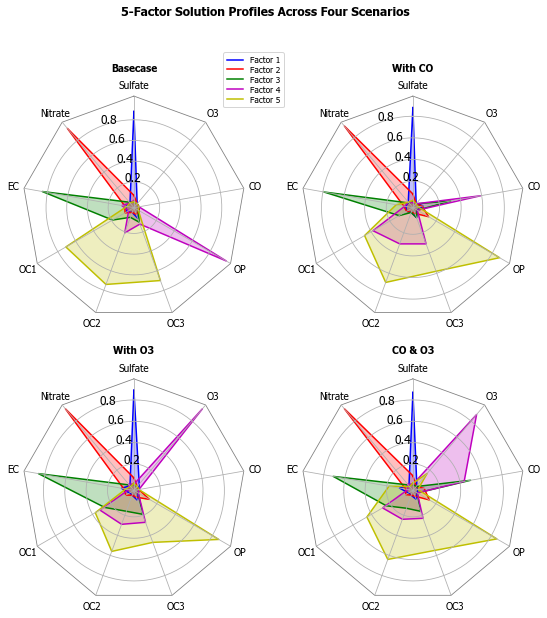

In [49]:
#Radar chart (aka spider or star chart)

'''
This example creates a radar chart, also known as a spider or star chart [1].

Although this example allows a frame of either ‘circle’ or ‘polygon’, polygon frames don’t have proper gridlines (the lines are circles instead of polygons). It’s possible to get a polygon grid by setting GRIDLINE_INTERPOLATION_STEPS in matplotlib.axis to the desired number of vertices, but the orientation of the polygon is not aligned with the radial axes.

[1]	http://en.wikipedia.org/wiki/Radar_chart

'''


import numpy as np

import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    def draw_poly_patch(self):
        # rotate theta such that the first axis is at the top
        verts = unit_poly_verts(theta + np.pi / 2)
        return plt.Polygon(verts, closed=True, edgecolor='k')

    def draw_circle_patch(self):
        # unit circle centered on (0.5, 0.5)
        return plt.Circle((0.5, 0.5), 0.5)

    patch_dict = {'polygon': draw_poly_patch, 'circle': draw_circle_patch}
    if frame not in patch_dict:
        raise ValueError('unknown value for `frame`: %s' % frame)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1
        # define draw_frame method
        draw_patch = patch_dict[frame]

        def __init__(self, *args, **kwargs):
            super(RadarAxes, self).__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, **kwargs):
            """Override fill so that line is closed by default"""
            closed = kwargs.pop('closed', True)
            return super(RadarAxes, self).fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super(RadarAxes, self).plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            return self.draw_patch()

        def _gen_axes_spines(self):
            if frame == 'circle':
                return PolarAxes._gen_axes_spines(self)
            # The following is a hack to get the spines (i.e. the axes frame)
            # to draw correctly for a polygon frame.

            # spine_type must be 'left', 'right', 'top', 'bottom', or `circle`.
            spine_type = 'circle'
            verts = unit_poly_verts(theta + np.pi / 2)
            # close off polygon by repeating first vertex
            verts.append(verts[0])
            path = Path(verts)

            spine = Spine(self, spine_type, path)
            spine.set_transform(self.transAxes)
            return {'polar': spine}

    register_projection(RadarAxes)
    return theta


def unit_poly_verts(theta):
    """Return vertices of polygon for subplot axes.

    This polygon is circumscribed by a unit circle centered at (0.5, 0.5)
    """
    x0, y0, r = [0.5] * 3
    verts = [(r*np.cos(t) + x0, r*np.sin(t) + y0) for t in theta]
    return verts


def example_data():
    # The following data is from the Denver Aerosol Sources and Health study.
    # See  doi:10.1016/j.atmosenv.2008.12.017
    #
    # The data are pollution source profile estimates for five modeled
    # pollution sources (e.g., cars, wood-burning, etc) that emit 7-9 chemical
    # species. The radar charts are experimented with here to see if we can
    # nicely visualize how the modeled source profiles change across four
    # scenarios:
    #  1) No gas-phase species present, just seven particulate counts on
    #     Sulfate
    #     Nitrate
    #     Elemental Carbon (EC)
    #     Organic Carbon fraction 1 (OC)
    #     Organic Carbon fraction 2 (OC2)
    #     Organic Carbon fraction 3 (OC3)
    #     Pyrolized Organic Carbon (OP)
    #  2)Inclusion of gas-phase specie carbon monoxide (CO)
    #  3)Inclusion of gas-phase specie ozone (O3).
    #  4)Inclusion of both gas-phase species is present...
    data = [
        ['Sulfate', 'Nitrate', 'EC', 'OC1', 'OC2', 'OC3', 'OP', 'CO', 'O3'],
        ('Basecase', [
            [0.88, 0.01, 0.03, 0.03, 0.00, 0.06, 0.01, 0.00, 0.00],
            [0.07, 0.95, 0.04, 0.05, 0.00, 0.02, 0.01, 0.00, 0.00],
            [0.01, 0.02, 0.85, 0.19, 0.05, 0.10, 0.00, 0.00, 0.00],
            [0.02, 0.01, 0.07, 0.01, 0.21, 0.12, 0.98, 0.00, 0.00],
            [0.01, 0.01, 0.02, 0.71, 0.74, 0.70, 0.00, 0.00, 0.00]]),
        ('With CO', [
            [0.88, 0.02, 0.02, 0.02, 0.00, 0.05, 0.00, 0.05, 0.00],
            [0.08, 0.94, 0.04, 0.02, 0.00, 0.01, 0.12, 0.04, 0.00],
            [0.01, 0.01, 0.79, 0.10, 0.00, 0.05, 0.00, 0.31, 0.00],
            [0.00, 0.02, 0.03, 0.38, 0.31, 0.31, 0.00, 0.59, 0.00],
            [0.02, 0.02, 0.11, 0.47, 0.69, 0.58, 0.88, 0.00, 0.00]]),
        ('With O3', [
            [0.89, 0.01, 0.07, 0.00, 0.00, 0.05, 0.00, 0.00, 0.03],
            [0.07, 0.95, 0.05, 0.04, 0.00, 0.02, 0.12, 0.00, 0.00],
            [0.01, 0.02, 0.86, 0.27, 0.16, 0.19, 0.00, 0.00, 0.00],
            [0.01, 0.03, 0.00, 0.32, 0.29, 0.27, 0.00, 0.00, 0.95],
            [0.02, 0.00, 0.03, 0.37, 0.56, 0.47, 0.87, 0.00, 0.00]]),
        ('CO & O3', [
            [0.87, 0.01, 0.08, 0.00, 0.00, 0.04, 0.00, 0.00, 0.01],
            [0.09, 0.95, 0.02, 0.03, 0.00, 0.01, 0.13, 0.06, 0.00],
            [0.01, 0.02, 0.71, 0.24, 0.13, 0.16, 0.00, 0.50, 0.00],
            [0.01, 0.03, 0.00, 0.28, 0.24, 0.23, 0.00, 0.44, 0.88],
            [0.02, 0.00, 0.18, 0.45, 0.64, 0.55, 0.86, 0.00, 0.16]])
    ]
    return data


if __name__ == '__main__':
    N = 9
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data.pop(0)

    fig, axes = plt.subplots(figsize=(9, 9), nrows=2, ncols=2,
                             subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    colors = ['b', 'r', 'g', 'm', 'y']
    # Plot the four cases from the example data on separate axes
    for ax, (title, case_data) in zip(axes.flatten(), data):
        ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
        ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
        for d, color in zip(case_data, colors):
            ax.plot(theta, d, color=color)
            ax.fill(theta, d, facecolor=color, alpha=0.25)
        ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    ax = axes[0, 0]
    labels = ('Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5')
    legend = ax.legend(labels, loc=(0.9, .95),
                       labelspacing=0.1, fontsize='small')

    fig.text(0.5, 0.965, '5-Factor Solution Profiles Across Four Scenarios',
             horizontalalignment='center', color='black', weight='bold',
             size='large')

    plt.show()

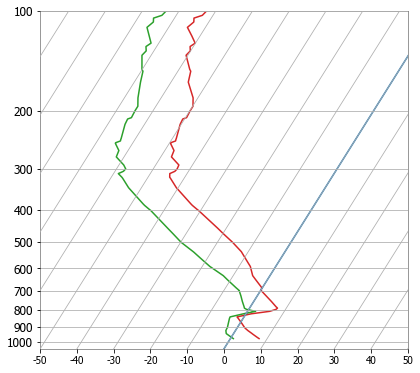

In [50]:
#SkewT-logP diagram: using transforms and custom projections
'''
This serves as an intensive exercise of matplotlib’s transforms and custom projection API. 
This example produces a so-called SkewT-logP diagram, which is a common plot in meteorology 
for displaying vertical profiles of temperature. As far as matplotlib is concerned, the complexity 
comes from having X and Y axes that are not orthogonal. This is handled by including a skew component 
to the basic Axes transforms. Additional complexity comes in handling the fact that the upper and lower 
X-axes have different data ranges, which necessitates a bunch of custom classes for ticks,spines, 
and the axis to handle this.
'''

from matplotlib.axes import Axes
import matplotlib.transforms as transforms
import matplotlib.axis as maxis
import matplotlib.spines as mspines
from matplotlib.projections import register_projection


# The sole purpose of this class is to look at the upper, lower, or total
# interval as appropriate and see what parts of the tick to draw, if any.
class SkewXTick(maxis.XTick):
    def update_position(self, loc):
        # This ensures that the new value of the location is set before
        # any other updates take place
        self._loc = loc
        super(SkewXTick, self).update_position(loc)

    def _has_default_loc(self):
        return self.get_loc() is None

    def _need_lower(self):
        return (self._has_default_loc() or
                transforms.interval_contains(self.axes.lower_xlim,
                                             self.get_loc()))

    def _need_upper(self):
        return (self._has_default_loc() or
                transforms.interval_contains(self.axes.upper_xlim,
                                             self.get_loc()))

    @property
    def gridOn(self):
        return (self._gridOn and (self._has_default_loc() or
                transforms.interval_contains(self.get_view_interval(),
                                             self.get_loc())))

    @gridOn.setter
    def gridOn(self, value):
        self._gridOn = value

    @property
    def tick1On(self):
        return self._tick1On and self._need_lower()

    @tick1On.setter
    def tick1On(self, value):
        self._tick1On = value

    @property
    def label1On(self):
        return self._label1On and self._need_lower()

    @label1On.setter
    def label1On(self, value):
        self._label1On = value

    @property
    def tick2On(self):
        return self._tick2On and self._need_upper()

    @tick2On.setter
    def tick2On(self, value):
        self._tick2On = value

    @property
    def label2On(self):
        return self._label2On and self._need_upper()

    @label2On.setter
    def label2On(self, value):
        self._label2On = value

    def get_view_interval(self):
        return self.axes.xaxis.get_view_interval()


# This class exists to provide two separate sets of intervals to the tick,
# as well as create instances of the custom tick
class SkewXAxis(maxis.XAxis):
    def _get_tick(self, major):
        return SkewXTick(self.axes, None, '', major=major)

    def get_view_interval(self):
        return self.axes.upper_xlim[0], self.axes.lower_xlim[1]


# This class exists to calculate the separate data range of the
# upper X-axis and draw the spine there. It also provides this range
# to the X-axis artist for ticking and gridlines
class SkewSpine(mspines.Spine):
    def _adjust_location(self):
        pts = self._path.vertices
        if self.spine_type == 'top':
            pts[:, 0] = self.axes.upper_xlim
        else:
            pts[:, 0] = self.axes.lower_xlim


# This class handles registration of the skew-xaxes as a projection as well
# as setting up the appropriate transformations. It also overrides standard
# spines and axes instances as appropriate.
class SkewXAxes(Axes):
    # The projection must specify a name.  This will be used be the
    # user to select the projection, i.e. ``subplot(111,
    # projection='skewx')``.
    name = 'skewx'

    def _init_axis(self):
        # Taken from Axes and modified to use our modified X-axis
        self.xaxis = SkewXAxis(self)
        self.spines['top'].register_axis(self.xaxis)
        self.spines['bottom'].register_axis(self.xaxis)
        self.yaxis = maxis.YAxis(self)
        self.spines['left'].register_axis(self.yaxis)
        self.spines['right'].register_axis(self.yaxis)

    def _gen_axes_spines(self):
        spines = {'top': SkewSpine.linear_spine(self, 'top'),
                  'bottom': mspines.Spine.linear_spine(self, 'bottom'),
                  'left': mspines.Spine.linear_spine(self, 'left'),
                  'right': mspines.Spine.linear_spine(self, 'right')}
        return spines

    def _set_lim_and_transforms(self):
        """
        This is called once when the plot is created to set up all the
        transforms for the data, text and grids.
        """
        rot = 30

        # Get the standard transform setup from the Axes base class
        Axes._set_lim_and_transforms(self)

        # Need to put the skew in the middle, after the scale and limits,
        # but before the transAxes. This way, the skew is done in Axes
        # coordinates thus performing the transform around the proper origin
        # We keep the pre-transAxes transform around for other users, like the
        # spines for finding bounds
        self.transDataToAxes = self.transScale + \
            self.transLimits + transforms.Affine2D().skew_deg(rot, 0)

        # Create the full transform from Data to Pixels
        self.transData = self.transDataToAxes + self.transAxes

        # Blended transforms like this need to have the skewing applied using
        # both axes, in axes coords like before.
        self._xaxis_transform = (transforms.blended_transform_factory(
            self.transScale + self.transLimits,
            transforms.IdentityTransform()) +
            transforms.Affine2D().skew_deg(rot, 0)) + self.transAxes

    @property
    def lower_xlim(self):
        return self.axes.viewLim.intervalx

    @property
    def upper_xlim(self):
        pts = [[0., 1.], [1., 1.]]
        return self.transDataToAxes.inverted().transform(pts)[:, 0]


# Now register the projection with matplotlib so the user can select
# it.
register_projection(SkewXAxes)

if __name__ == '__main__':
    # Now make a simple example using the custom projection.
    from matplotlib.ticker import (MultipleLocator, NullFormatter,
                                   ScalarFormatter)
    import matplotlib.pyplot as plt
    from six import StringIO
    import numpy as np

    # Some examples data
    data_txt = '''
  978.0    345    7.8    0.8     61   4.16    325     14  282.7  294.6  283.4
  971.0    404    7.2    0.2     61   4.01    327     17  282.7  294.2  283.4
  946.7    610    5.2   -1.8     61   3.56    335     26  282.8  293.0  283.4
  944.0    634    5.0   -2.0     61   3.51    336     27  282.8  292.9  283.4
  925.0    798    3.4   -2.6     65   3.43    340     32  282.8  292.7  283.4
  911.8    914    2.4   -2.7     69   3.46    345     37  282.9  292.9  283.5
  906.0    966    2.0   -2.7     71   3.47    348     39  283.0  293.0  283.6
  877.9   1219    0.4   -3.2     77   3.46      0     48  283.9  293.9  284.5
  850.0   1478   -1.3   -3.7     84   3.44      0     47  284.8  294.8  285.4
  841.0   1563   -1.9   -3.8     87   3.45    358     45  285.0  295.0  285.6
  823.0   1736    1.4   -0.7     86   4.44    353     42  290.3  303.3  291.0
  813.6   1829    4.5    1.2     80   5.17    350     40  294.5  309.8  295.4
  809.0   1875    6.0    2.2     77   5.57    347     39  296.6  313.2  297.6
  798.0   1988    7.4   -0.6     57   4.61    340     35  299.2  313.3  300.1
  791.0   2061    7.6   -1.4     53   4.39    335     33  300.2  313.6  301.0
  783.9   2134    7.0   -1.7     54   4.32    330     31  300.4  313.6  301.2
  755.1   2438    4.8   -3.1     57   4.06    300     24  301.2  313.7  301.9
  727.3   2743    2.5   -4.4     60   3.81    285     29  301.9  313.8  302.6
  700.5   3048    0.2   -5.8     64   3.57    275     31  302.7  313.8  303.3
  700.0   3054    0.2   -5.8     64   3.56    280     31  302.7  313.8  303.3
  698.0   3077    0.0   -6.0     64   3.52    280     31  302.7  313.7  303.4
  687.0   3204   -0.1   -7.1     59   3.28    281     31  304.0  314.3  304.6
  648.9   3658   -3.2  -10.9     55   2.59    285     30  305.5  313.8  305.9
  631.0   3881   -4.7  -12.7     54   2.29    289     33  306.2  313.6  306.6
  600.7   4267   -6.4  -16.7     44   1.73    295     39  308.6  314.3  308.9
  592.0   4381   -6.9  -17.9     41   1.59    297     41  309.3  314.6  309.6
  577.6   4572   -8.1  -19.6     39   1.41    300     44  310.1  314.9  310.3
  555.3   4877  -10.0  -22.3     36   1.16    295     39  311.3  315.3  311.5
  536.0   5151  -11.7  -24.7     33   0.97    304     39  312.4  315.8  312.6
  533.8   5182  -11.9  -25.0     33   0.95    305     39  312.5  315.8  312.7
  500.0   5680  -15.9  -29.9     29   0.64    290     44  313.6  315.9  313.7
  472.3   6096  -19.7  -33.4     28   0.49    285     46  314.1  315.8  314.1
  453.0   6401  -22.4  -36.0     28   0.39    300     50  314.4  315.8  314.4
  400.0   7310  -30.7  -43.7     27   0.20    285     44  315.0  315.8  315.0
  399.7   7315  -30.8  -43.8     27   0.20    285     44  315.0  315.8  315.0
  387.0   7543  -33.1  -46.1     26   0.16    281     47  314.9  315.5  314.9
  382.7   7620  -33.8  -46.8     26   0.15    280     48  315.0  315.6  315.0
  342.0   8398  -40.5  -53.5     23   0.08    293     52  316.1  316.4  316.1
  320.4   8839  -43.7  -56.7     22   0.06    300     54  317.6  317.8  317.6
  318.0   8890  -44.1  -57.1     22   0.05    301     55  317.8  318.0  317.8
  310.0   9060  -44.7  -58.7     19   0.04    304     61  319.2  319.4  319.2
  306.1   9144  -43.9  -57.9     20   0.05    305     63  321.5  321.7  321.5
  305.0   9169  -43.7  -57.7     20   0.05    303     63  322.1  322.4  322.1
  300.0   9280  -43.5  -57.5     20   0.05    295     64  323.9  324.2  323.9
  292.0   9462  -43.7  -58.7     17   0.05    293     67  326.2  326.4  326.2
  276.0   9838  -47.1  -62.1     16   0.03    290     74  326.6  326.7  326.6
  264.0  10132  -47.5  -62.5     16   0.03    288     79  330.1  330.3  330.1
  251.0  10464  -49.7  -64.7     16   0.03    285     85  331.7  331.8  331.7
  250.0  10490  -49.7  -64.7     16   0.03    285     85  332.1  332.2  332.1
  247.0  10569  -48.7  -63.7     16   0.03    283     88  334.7  334.8  334.7
  244.0  10649  -48.9  -63.9     16   0.03    280     91  335.6  335.7  335.6
  243.3  10668  -48.9  -63.9     16   0.03    280     91  335.8  335.9  335.8
  220.0  11327  -50.3  -65.3     15   0.03    280     85  343.5  343.6  343.5
  212.0  11569  -50.5  -65.5     15   0.03    280     83  346.8  346.9  346.8
  210.0  11631  -49.7  -64.7     16   0.03    280     83  349.0  349.1  349.0
  200.0  11950  -49.9  -64.9     15   0.03    280     80  353.6  353.7  353.6
  194.0  12149  -49.9  -64.9     15   0.03    279     78  356.7  356.8  356.7
  183.0  12529  -51.3  -66.3     15   0.03    278     75  360.4  360.5  360.4
  164.0  13233  -55.3  -68.3     18   0.02    277     69  365.2  365.3  365.2
  152.0  13716  -56.5  -69.5     18   0.02    275     65  371.1  371.2  371.1
  150.0  13800  -57.1  -70.1     18   0.02    275     64  371.5  371.6  371.5
  136.0  14414  -60.5  -72.5     19   0.02    268     54  376.0  376.1  376.0
  132.0  14600  -60.1  -72.1     19   0.02    265     51  380.0  380.1  380.0
  131.4  14630  -60.2  -72.2     19   0.02    265     51  380.3  380.4  380.3
  128.0  14792  -60.9  -72.9     19   0.02    266     50  381.9  382.0  381.9
  125.0  14939  -60.1  -72.1     19   0.02    268     49  385.9  386.0  385.9
  119.0  15240  -62.2  -73.8     20   0.01    270     48  387.4  387.5  387.4
  112.0  15616  -64.9  -75.9     21   0.01    265     53  389.3  389.3  389.3
  108.0  15838  -64.1  -75.1     21   0.01    265     58  394.8  394.9  394.8
  107.8  15850  -64.1  -75.1     21   0.01    265     58  395.0  395.1  395.0
  105.0  16010  -64.7  -75.7     21   0.01    272     50  396.9  396.9  396.9
  103.0  16128  -62.9  -73.9     21   0.02    277     45  402.5  402.6  402.5
  100.0  16310  -62.5  -73.5     21   0.02    285     36  406.7  406.8  406.7
    '''

    # Parse the data
    sound_data = StringIO(data_txt)
    p, h, T, Td = np.loadtxt(sound_data, usecols=range(0, 4), unpack=True)

    # Create a new figure. The dimensions here give a good aspect ratio
    fig = plt.figure(figsize=(6.5875, 6.2125))
    ax = fig.add_subplot(111, projection='skewx')

    plt.grid(True)

    # Plot the data using normal plotting functions, in this case using
    # log scaling in Y, as dictated by the typical meteorological plot
    ax.semilogy(T, p, color='C3')
    ax.semilogy(Td, p, color='C2')

    # An example of a slanted line at constant X
    l = ax.axvline(0, color='C0')

    # Disables the log-formatting that comes with semilogy
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_minor_formatter(NullFormatter())
    ax.set_yticks(np.linspace(100, 1000, 10))
    ax.set_ylim(1050, 100)

    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.set_xlim(-50, 50)

3    plt.show()

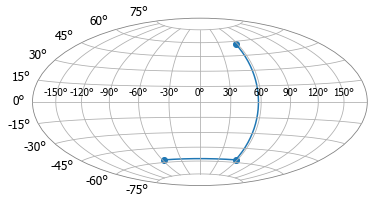

In [51]:
#Custom projection

#This example showcases the Hammer projection by alleviating many features of matplotlib.

from __future__ import unicode_literals

import matplotlib
from matplotlib.axes import Axes
from matplotlib.patches import Circle
from matplotlib.path import Path
from matplotlib.ticker import NullLocator, Formatter, FixedLocator
from matplotlib.transforms import Affine2D, BboxTransformTo, Transform
from matplotlib.projections import register_projection
import matplotlib.spines as mspines
import matplotlib.axis as maxis
import numpy as np

rcParams = matplotlib.rcParams

# This example projection class is rather long, but it is designed to
# illustrate many features, not all of which will be used every time.
# It is also common to factor out a lot of these methods into common
# code used by a number of projections with similar characteristics
# (see geo.py).


class GeoAxes(Axes):
    """
    An abstract base class for geographic projections
    """
    class ThetaFormatter(Formatter):
        """
        Used to format the theta tick labels.  Converts the native
        unit of radians into degrees and adds a degree symbol.
        """
        def __init__(self, round_to=1.0):
            self._round_to = round_to

        def __call__(self, x, pos=None):
            degrees = np.round(np.rad2deg(x) / self._round_to) * self._round_to
            if rcParams['text.usetex'] and not rcParams['text.latex.unicode']:
                return r"$%0.0f^\circ$" % degrees
            else:
                return "%0.0f\N{DEGREE SIGN}" % degrees

    RESOLUTION = 75

    def _init_axis(self):
        self.xaxis = maxis.XAxis(self)
        self.yaxis = maxis.YAxis(self)
        # Do not register xaxis or yaxis with spines -- as done in
        # Axes._init_axis() -- until GeoAxes.xaxis.cla() works.
        # self.spines['geo'].register_axis(self.yaxis)
        self._update_transScale()

    def cla(self):
        Axes.cla(self)

        self.set_longitude_grid(30)
        self.set_latitude_grid(15)
        self.set_longitude_grid_ends(75)
        self.xaxis.set_minor_locator(NullLocator())
        self.yaxis.set_minor_locator(NullLocator())
        self.xaxis.set_ticks_position('none')
        self.yaxis.set_ticks_position('none')
        self.yaxis.set_tick_params(label1On=True)
        # Why do we need to turn on yaxis tick labels, but
        # xaxis tick labels are already on?

        self.grid(rcParams['axes.grid'])

        Axes.set_xlim(self, -np.pi, np.pi)
        Axes.set_ylim(self, -np.pi / 2.0, np.pi / 2.0)

    def _set_lim_and_transforms(self):
        # A (possibly non-linear) projection on the (already scaled) data

        # There are three important coordinate spaces going on here:
        #
        #    1. Data space: The space of the data itself
        #
        #    2. Axes space: The unit rectangle (0, 0) to (1, 1)
        #       covering the entire plot area.
        #
        #    3. Display space: The coordinates of the resulting image,
        #       often in pixels or dpi/inch.

        # This function makes heavy use of the Transform classes in
        # ``lib/matplotlib/transforms.py.`` For more information, see
        # the inline documentation there.

        # The goal of the first two transformations is to get from the
        # data space (in this case longitude and latitude) to axes
        # space.  It is separated into a non-affine and affine part so
        # that the non-affine part does not have to be recomputed when
        # a simple affine change to the figure has been made (such as
        # resizing the window or changing the dpi).

        # 1) The core transformation from data space into
        # rectilinear space defined in the HammerTransform class.
        self.transProjection = self._get_core_transform(self.RESOLUTION)

        # 2) The above has an output range that is not in the unit
        # rectangle, so scale and translate it so it fits correctly
        # within the axes.  The peculiar calculations of xscale and
        # yscale are specific to a Aitoff-Hammer projection, so don't
        # worry about them too much.
        self.transAffine = self._get_affine_transform()

        # 3) This is the transformation from axes space to display
        # space.
        self.transAxes = BboxTransformTo(self.bbox)

        # Now put these 3 transforms together -- from data all the way
        # to display coordinates.  Using the '+' operator, these
        # transforms will be applied "in order".  The transforms are
        # automatically simplified, if possible, by the underlying
        # transformation framework.
        self.transData = \
            self.transProjection + \
            self.transAffine + \
            self.transAxes

        # The main data transformation is set up.  Now deal with
        # gridlines and tick labels.

        # Longitude gridlines and ticklabels.  The input to these
        # transforms are in display space in x and axes space in y.
        # Therefore, the input values will be in range (-xmin, 0),
        # (xmax, 1).  The goal of these transforms is to go from that
        # space to display space.  The tick labels will be offset 4
        # pixels from the equator.
        self._xaxis_pretransform = \
            Affine2D() \
            .scale(1.0, self._longitude_cap * 2.0) \
            .translate(0.0, -self._longitude_cap)
        self._xaxis_transform = \
            self._xaxis_pretransform + \
            self.transData
        self._xaxis_text1_transform = \
            Affine2D().scale(1.0, 0.0) + \
            self.transData + \
            Affine2D().translate(0.0, 4.0)
        self._xaxis_text2_transform = \
            Affine2D().scale(1.0, 0.0) + \
            self.transData + \
            Affine2D().translate(0.0, -4.0)

        # Now set up the transforms for the latitude ticks.  The input to
        # these transforms are in axes space in x and display space in
        # y.  Therefore, the input values will be in range (0, -ymin),
        # (1, ymax).  The goal of these transforms is to go from that
        # space to display space.  The tick labels will be offset 4
        # pixels from the edge of the axes ellipse.
        yaxis_stretch = Affine2D().scale(np.pi*2, 1).translate(-np.pi, 0)
        yaxis_space = Affine2D().scale(1.0, 1.1)
        self._yaxis_transform = \
            yaxis_stretch + \
            self.transData
        yaxis_text_base = \
            yaxis_stretch + \
            self.transProjection + \
            (yaxis_space +
             self.transAffine +
             self.transAxes)
        self._yaxis_text1_transform = \
            yaxis_text_base + \
            Affine2D().translate(-8.0, 0.0)
        self._yaxis_text2_transform = \
            yaxis_text_base + \
            Affine2D().translate(8.0, 0.0)

    def _get_affine_transform(self):
        transform = self._get_core_transform(1)
        xscale, _ = transform.transform_point((np.pi, 0))
        _, yscale = transform.transform_point((0, np.pi / 2.0))
        return Affine2D() \
            .scale(0.5 / xscale, 0.5 / yscale) \
            .translate(0.5, 0.5)

    def get_xaxis_transform(self, which='grid'):
        """
        Override this method to provide a transformation for the
        x-axis tick labels.

        Returns a tuple of the form (transform, valign, halign)
        """
        if which not in ['tick1', 'tick2', 'grid']:
            msg = "'which' must be on of [ 'tick1' | 'tick2' | 'grid' ]"
            raise ValueError(msg)
        return self._xaxis_transform

    def get_xaxis_text1_transform(self, pad):
        return self._xaxis_text1_transform, 'bottom', 'center'

    def get_xaxis_text2_transform(self, pad):
        """
        Override this method to provide a transformation for the
        secondary x-axis tick labels.

        Returns a tuple of the form (transform, valign, halign)
        """
        return self._xaxis_text2_transform, 'top', 'center'

    def get_yaxis_transform(self, which='grid'):
        """
        Override this method to provide a transformation for the
        y-axis grid and ticks.
        """
        if which not in ['tick1', 'tick2', 'grid']:
            msg = "'which' must be one of [ 'tick1' | 'tick2' | 'grid' ]"
            raise ValueError(msg)
        return self._yaxis_transform

    def get_yaxis_text1_transform(self, pad):
        """
        Override this method to provide a transformation for the
        y-axis tick labels.

        Returns a tuple of the form (transform, valign, halign)
        """
        return self._yaxis_text1_transform, 'center', 'right'

    def get_yaxis_text2_transform(self, pad):
        """
        Override this method to provide a transformation for the
        secondary y-axis tick labels.

        Returns a tuple of the form (transform, valign, halign)
        """
        return self._yaxis_text2_transform, 'center', 'left'

    def _gen_axes_patch(self):
        """
        Override this method to define the shape that is used for the
        background of the plot.  It should be a subclass of Patch.

        In this case, it is a Circle (that may be warped by the axes
        transform into an ellipse).  Any data and gridlines will be
        clipped to this shape.
        """
        return Circle((0.5, 0.5), 0.5)

    def _gen_axes_spines(self):
        return {'geo': mspines.Spine.circular_spine(self, (0.5, 0.5), 0.5)}

    def set_yscale(self, *args, **kwargs):
        if args[0] != 'linear':
            raise NotImplementedError

    # Prevent the user from applying scales to one or both of the
    # axes.  In this particular case, scaling the axes wouldn't make
    # sense, so we don't allow it.
    set_xscale = set_yscale

    # Prevent the user from changing the axes limits.  In our case, we
    # want to display the whole sphere all the time, so we override
    # set_xlim and set_ylim to ignore any input.  This also applies to
    # interactive panning and zooming in the GUI interfaces.
    def set_xlim(self, *args, **kwargs):
        raise TypeError("It is not possible to change axes limits "
                        "for geographic projections. Please consider "
                        "using Basemap or Cartopy.")

    set_ylim = set_xlim

    def format_coord(self, lon, lat):
        """
        Override this method to change how the values are displayed in
        the status bar.

        In this case, we want them to be displayed in degrees N/S/E/W.
        """
        lon, lat = np.rad2deg([lon, lat])
        if lat >= 0.0:
            ns = 'N'
        else:
            ns = 'S'
        if lon >= 0.0:
            ew = 'E'
        else:
            ew = 'W'
        return ('%f\N{DEGREE SIGN}%s, %f\N{DEGREE SIGN}%s'
                % (abs(lat), ns, abs(lon), ew))

    def set_longitude_grid(self, degrees):
        """
        Set the number of degrees between each longitude grid.

        This is an example method that is specific to this projection
        class -- it provides a more convenient interface to set the
        ticking than set_xticks would.
        """
        # Skip -180 and 180, which are the fixed limits.
        grid = np.arange(-180 + degrees, 180, degrees)
        self.xaxis.set_major_locator(FixedLocator(np.deg2rad(grid)))
        self.xaxis.set_major_formatter(self.ThetaFormatter(degrees))

    def set_latitude_grid(self, degrees):
        """
        Set the number of degrees between each longitude grid.

        This is an example method that is specific to this projection
        class -- it provides a more convenient interface than
        set_yticks would.
        """
        # Skip -90 and 90, which are the fixed limits.
        grid = np.arange(-90 + degrees, 90, degrees)
        self.yaxis.set_major_locator(FixedLocator(np.deg2rad(grid)))
        self.yaxis.set_major_formatter(self.ThetaFormatter(degrees))

    def set_longitude_grid_ends(self, degrees):
        """
        Set the latitude(s) at which to stop drawing the longitude grids.

        Often, in geographic projections, you wouldn't want to draw
        longitude gridlines near the poles.  This allows the user to
        specify the degree at which to stop drawing longitude grids.

        This is an example method that is specific to this projection
        class -- it provides an interface to something that has no
        analogy in the base Axes class.
        """
        self._longitude_cap = np.deg2rad(degrees)
        self._xaxis_pretransform \
            .clear() \
            .scale(1.0, self._longitude_cap * 2.0) \
            .translate(0.0, -self._longitude_cap)

    def get_data_ratio(self):
        """
        Return the aspect ratio of the data itself.

        This method should be overridden by any Axes that have a
        fixed data ratio.
        """
        return 1.0

    # Interactive panning and zooming is not supported with this projection,
    # so we override all of the following methods to disable it.
    def can_zoom(self):
        """
        Return *True* if this axes supports the zoom box button functionality.
        This axes object does not support interactive zoom box.
        """
        return False

    def can_pan(self):
        """
        Return *True* if this axes supports the pan/zoom button functionality.
        This axes object does not support interactive pan/zoom.
        """
        return False

    def start_pan(self, x, y, button):
        pass

    def end_pan(self):
        pass

    def drag_pan(self, button, key, x, y):
        pass


class HammerAxes(GeoAxes):
    """
    A custom class for the Aitoff-Hammer projection, an equal-area map
    projection.

    https://en.wikipedia.org/wiki/Hammer_projection
    """

    # The projection must specify a name. This will be used by the
    # user to select the projection,
    # i.e. ``subplot(111, projection='custom_hammer')``.
    name = 'custom_hammer'

    class HammerTransform(Transform):
        """
        The base Hammer transform.
        """
        input_dims = 2
        output_dims = 2
        is_separable = False

        def __init__(self, resolution):
            """
            Create a new Hammer transform.  Resolution is the number of steps
            to interpolate between each input line segment to approximate its
            path in curved Hammer space.
            """
            Transform.__init__(self)
            self._resolution = resolution

        def transform_non_affine(self, ll):
            longitude = ll[:, 0:1]
            latitude = ll[:, 1:2]

            # Pre-compute some values
            half_long = longitude / 2.0
            cos_latitude = np.cos(latitude)
            sqrt2 = np.sqrt(2.0)

            alpha = np.sqrt(1.0 + cos_latitude * np.cos(half_long))
            x = (2.0 * sqrt2) * (cos_latitude * np.sin(half_long)) / alpha
            y = (sqrt2 * np.sin(latitude)) / alpha
            return np.concatenate((x, y), 1)
        transform_non_affine.__doc__ = Transform.transform_non_affine.__doc__

        def transform_path_non_affine(self, path):
            # vertices = path.vertices
            ipath = path.interpolated(self._resolution)
            return Path(self.transform(ipath.vertices), ipath.codes)
        transform_path_non_affine.__doc__ = \
            Transform.transform_path_non_affine.__doc__

        def inverted(self):
            return HammerAxes.InvertedHammerTransform(self._resolution)
        inverted.__doc__ = Transform.inverted.__doc__

    class InvertedHammerTransform(Transform):
        input_dims = 2
        output_dims = 2
        is_separable = False

        def __init__(self, resolution):
            Transform.__init__(self)
            self._resolution = resolution

        def transform_non_affine(self, xy):
            x, y = xy.T
            z = np.sqrt(1 - (x / 4) ** 2 - (y / 2) ** 2)
            longitude = 2 * np.arctan((z * x) / (2 * (2 * z ** 2 - 1)))
            latitude = np.arcsin(y*z)
            return np.column_stack([longitude, latitude])
        transform_non_affine.__doc__ = Transform.transform_non_affine.__doc__

        def inverted(self):
            return HammerAxes.HammerTransform(self._resolution)
        inverted.__doc__ = Transform.inverted.__doc__

    def __init__(self, *args, **kwargs):
        self._longitude_cap = np.pi / 2.0
        GeoAxes.__init__(self, *args, **kwargs)
        self.set_aspect(0.5, adjustable='box', anchor='C')
        self.cla()

    def _get_core_transform(self, resolution):
        return self.HammerTransform(resolution)


# Now register the projection with matplotlib so the user can select
# it.
register_projection(HammerAxes)


if __name__ == '__main__':
    import matplotlib.pyplot as plt
    # Now make a simple example using the custom projection.
    plt.subplot(111, projection="custom_hammer")
    p = plt.plot([-1, 1, 1], [-1, -1, 1], "o-")
    plt.grid(True)

    plt.show()
